### 仅供个人练习 原创作者链接：《某家二手房上海地区房源信息数据分析项目完整流程》（python)：https://www.yuque.com/docs/share/fbe91174-5928-4a45-86bd-9ecd7564bb86?#

In [ ]:
%matplotlib notebook
import numpy as np #处理数组narray
import pandas as pd #处理dataframe
import matplotlib  #画图
import matplotlib.pyplot as plt # 画图函数
import seaborn as sns # 统计绘图库
sns.set_style()   # 设置恢复seaborn包绘图的默认主题

In [2]:
# 导入二手房数据
data = pd.read_csv('./lianjian.csv',encoding='UTF8')
data.info()  # 查看data的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61538 entries, 0 to 61537
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      61538 non-null  int64  
 1   单价      61538 non-null  int64  
 2   总价      61538 non-null  float64
 3   户型      61538 non-null  object 
 4   楼层      61538 non-null  object 
 5   总楼层数    61538 non-null  int64  
 6   建筑面积    61538 non-null  float64
 7   朝向      61538 non-null  object 
 8   装修情况    61538 non-null  object 
 9   梯户比例    61538 non-null  object 
 10  配备电梯    61538 non-null  object 
 11  建造时间    61538 non-null  int64  
 12  建筑类型    61538 non-null  object 
 13  行政区     61538 non-null  object 
 14  地区      61538 non-null  object 
 15  小区名称    61538 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 7.5+ MB


In [3]:
new_data = data.dropna(axis=0, how='any', inplace=False)  # 删除含有缺失值的行
new_data.info()  #查看new_data的信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61538 entries, 0 to 61537
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      61538 non-null  int64  
 1   单价      61538 non-null  int64  
 2   总价      61538 non-null  float64
 3   户型      61538 non-null  object 
 4   楼层      61538 non-null  object 
 5   总楼层数    61538 non-null  int64  
 6   建筑面积    61538 non-null  float64
 7   朝向      61538 non-null  object 
 8   装修情况    61538 non-null  object 
 9   梯户比例    61538 non-null  object 
 10  配备电梯    61538 non-null  object 
 11  建造时间    61538 non-null  int64  
 12  建筑类型    61538 non-null  object 
 13  行政区     61538 non-null  object 
 14  地区      61538 non-null  object 
 15  小区名称    61538 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 8.0+ MB


In [4]:
new_data.head()  # 查看new_data中的前五条数据

编号     单价     总价        户型    楼层  总楼层数    建筑面积 朝向 装修情况  梯户比例  \
0  107100146112  87825  735.0  2室2厅1厨1卫  中楼层     17   83.69  南   精装  两梯四户   
1  107002290183  52891  365.0  2室1厅1厨1卫  低楼层      6   69.01  南   毛坯  一梯两户   
2  107100506160  54504  475.0  2室1厅1厨1卫  高楼层      6   87.15  南   简装  一梯两户   
3  107002076303  57972  400.0  2室1厅1厨1卫  中楼层      6   69.00  南   精装  一梯两户   
4  107100506441  74128  820.0  2室2厅1厨2卫  中楼层     11  110.62  南   其他  一梯两户   

  配备电梯  建造时间 建筑类型 行政区  地区              小区名称  
0    有  2011   板楼  浦东  北蔡      大华锦绣华城(十四街区)  
1    无  1995   板楼  浦东  北蔡              紫叶花园  
2    无  1995   板楼  浦东  北蔡              由由七村  
3    无  1997   板楼  浦东  北蔡              由由四村  
4    有  2006   板楼  浦东  北蔡  大华锦绣华城(十八街区)(公寓)

In [5]:
# 防止绘制的图形中出现中文乱码问题，进行如下设置
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号‘-’显示为方块的问题

# 构造一个自动绘制并保存饼形图的函数
def pie_plot(data,title,x):
    # pie_plot函数参数说明
    # data是绘制饼图的数据，title是饼图的标题，x是保存饼图图片时图片的名字
    fig,axes=plt.subplots(2,2) #绘制2*2的图
    data[0].plot(kind='pie',ax=axes[0,0],autopct='%.1f%%',startangle=90,label='')
    data[1].plot(kind='pie',ax=axes[0,1],autopct='%.1f%%',startangle=90,label='')
    data[2].plot(kind='pie',ax=axes[1,0],autopct='%.1f%%',startangle=90,label='')
    data[3].plot(kind='pie',ax=axes[1,1],autopct='%.1f%%',startangle=90,label='')
    # ax = axes[row_num][col_num]位置
    # autopct参数的作用是指定饼形图中数据标签的显示方式
    # '%.1f%%'表示数据标签的格式是保留一位小数的百分数
    # startangle=90 表示饼图的起始绘制角度是偏离x轴90度，并按逆时针绘制
    # lable=''后，饼形图的左边便不会再显示Series对象的名字
    
    axes[0,0].set_aspect('equal') #将横、纵坐标轴标准化处理,保证饼图是一个正圆,否则为椭圆
    axes[0,0].set_title('{}'.format(title[0])) # 设置饼图1的标题，追加
    
    axes[0,1].set_aspect('equal') # 设置饼图1的纵横比相等
    axes[0,1].set_title('{}'.format(title[1])) # 设置饼图1的标题
    
    axes[1,0].set_aspect('equal') # 设置饼图1的纵横比相等
    axes[1,0].set_title('{}'.format(title[2])) # 设置饼图1的标题
    
    axes[1,1].set_aspect('equal') # 设置饼图1的纵横比相等
    axes[1,1].set_title('{}'.format(title[3])) # 设置饼图1的标题
    
    plt.subplots_adjust(wspace=0.2,hspace=0.2) # 设置figure对象中子图的间距
    plt.rc('figure', figsize=(8,6)) #设置图片的大小
    plt.savefig('{}.png'.format(x)) # 保存图片

<IPython.core.display.Javascript object>


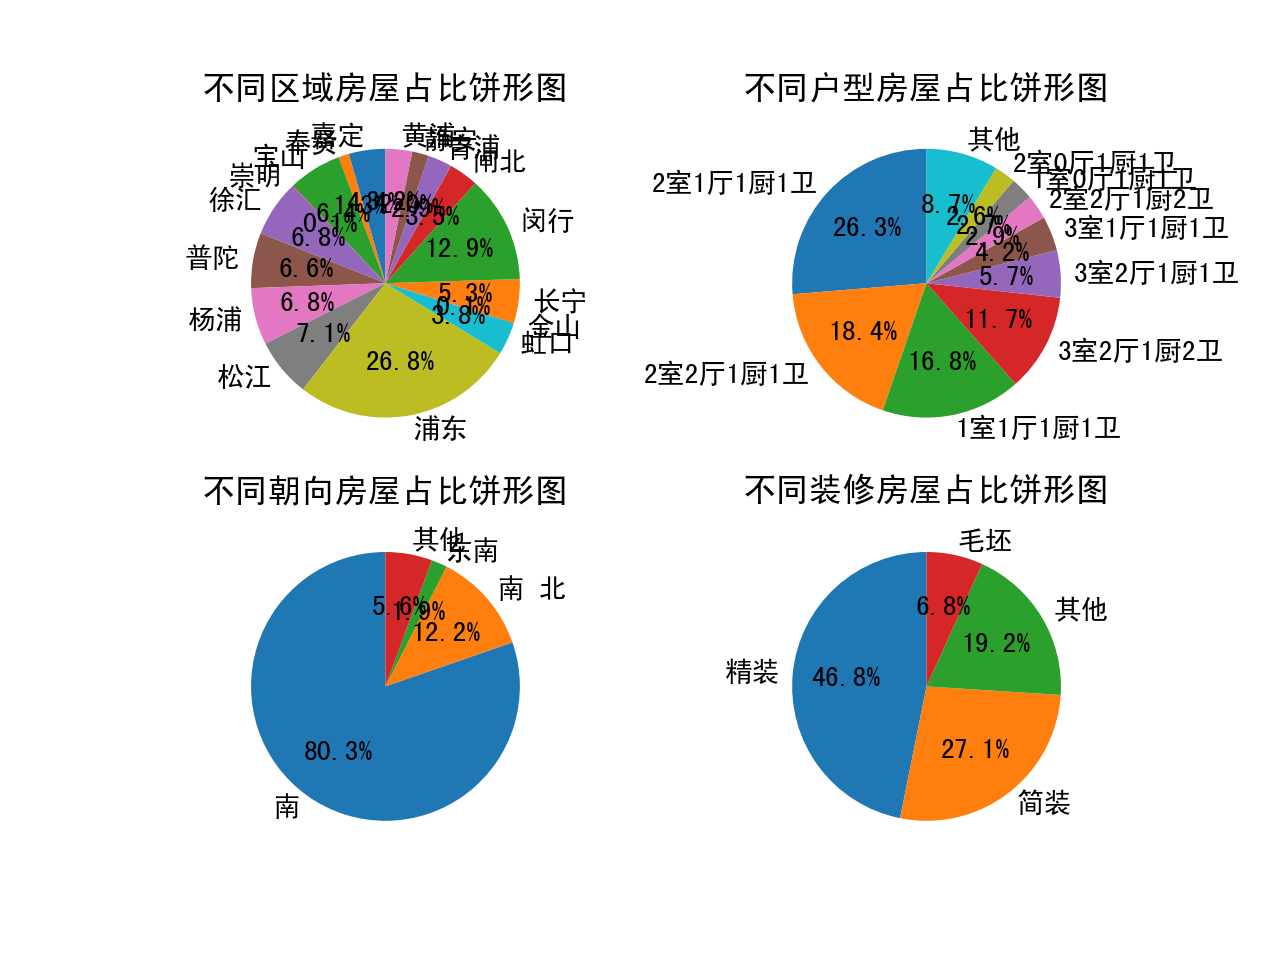

In [6]:
# 处理不同行政区的房屋数据：
count_by_region = new_data['行政区'].groupby(new_data['行政区']).count() # 对不同区域中的房屋进行分组统计；
#注意运行顺序，先groupby后count

# 处理房屋的户型数据：
count_by_house_type = new_data['户型'].groupby(new_data['户型']).count() # 对不同户型的房屋进行分组统计；
count_by_house_type.sort_values(ascending = False,inplace = True) # 将不同户型房屋的计数结果按降序排序
# 将总数在1500以下的户型统一归为其他类：
new_count_by_house_type = count_by_house_type[count_by_house_type > 1500]
new_count_by_house_type['其他'] = count_by_house_type[count_by_house_type < 1500].sum()

# 处理房屋的朝向数据：
count_by_orientation = data['朝向'].groupby(data['朝向']).count() # 对不同朝向的房屋进行分组统计;
count_by_orientation.sort_values(ascending = False,inplace = True) # 将不同朝向房屋的计数结果按降序排序
# 将总数在1000以下的户型统一归为其他类：
new_count_by_orientation = count_by_orientation[count_by_orientation > 1000]
new_count_by_orientation['其他'] = count_by_orientation[count_by_orientation < 1000].sum()

# 处理房屋装修情况的数据
count_by_decoration = new_data['装修情况'].groupby(new_data['装修情况']).count() # 对不同装修的房屋进行分组统计；
count_by_decoration.sort_values(ascending = False,inplace = True) # 将不同装修房屋的计数结果按降序排序

# 调用pie_plot函数绘制不同区域、不同户型、不同朝向和不同装修的饼形图
d1 = [count_by_region,new_count_by_house_type,new_count_by_orientation,count_by_decoration]
t1 = ['不同区域房屋占比饼形图','不同户型房屋占比饼形图','不同朝向房屋占比饼形图','不同装修房屋占比饼形图']
x1 = 'p1'
pie_plot(d1,t1,x1) #？？？

<IPython.core.display.Javascript object>


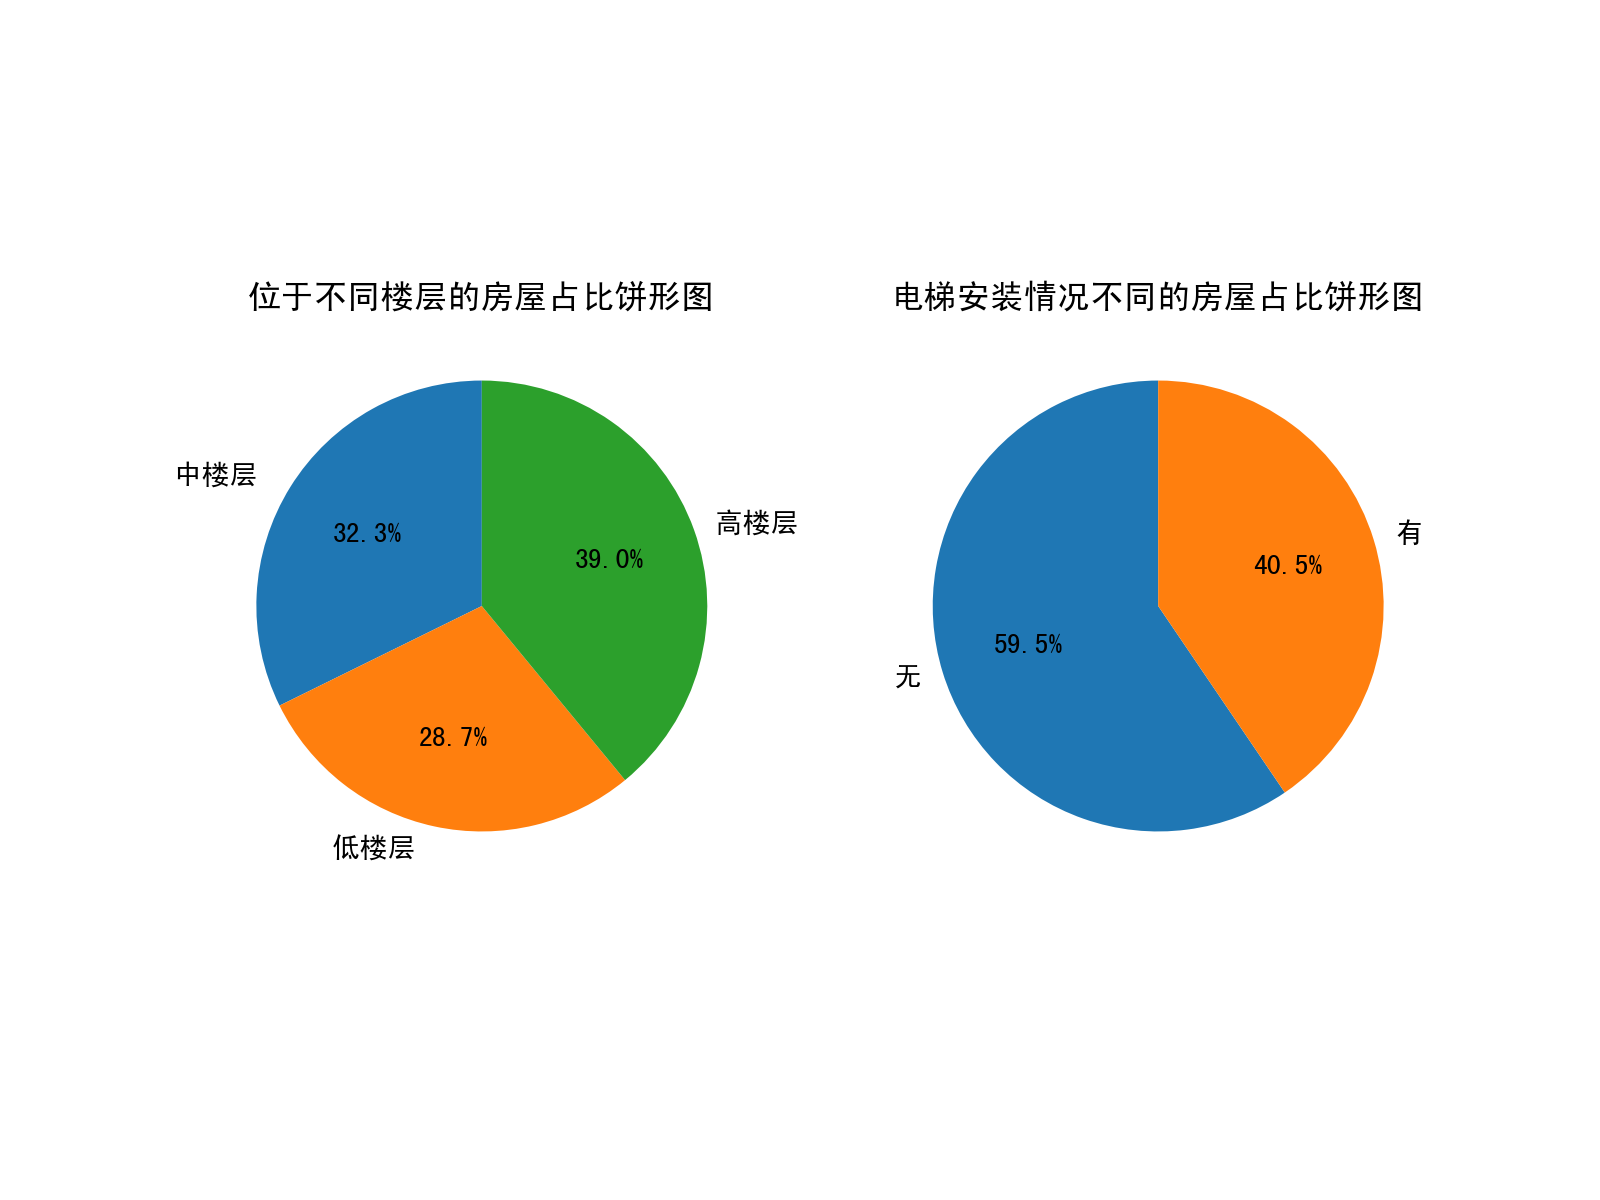

In [7]:
# 统计二手房的楼层位置

# 处理房屋的楼层位置数据：
count_by_floor_position = new_data['楼层'].groupby(new_data['楼层']).count() # 对于不同楼层的房屋数量进行分组统计

# 处理房屋电梯安装情况的数据：
count_by_elevator = new_data['配备电梯'].groupby(new_data['配备电梯']).count()  # 对电梯安装情况不同的房屋进行分组统计

# 绘制不同楼层位置的房屋占比统计图;
fig,axes = plt.subplots(1,2)
count_by_floor_position.plot(kind='pie',ax=axes[0],autopct='%.1f%%',startangle=90,label='')
count_by_elevator.plot(kind='pie',ax=axes[1],autopct='%.1f%%',startangle=90,label='')
 # autopct参数的作用是指定饼形图中数据标签的显示方式
 # '%.1f%%'表示数据标签的格式是保留一位小数的百分数
 # startangle=90 表示饼图的起始绘制角度是偏离x轴90度，并按逆时针绘制
 # lable=''后，饼形图的左边便不会再显示Series对象的名字

axes[0].set_aspect('equal')   # 设置饼形图的纵横比相等
axes[0].set_title('位于不同楼层的房屋占比饼形图')   # 设置饼形图的标题
 
axes[1].set_aspect('equal')
axes[1].set_title('电梯安装情况不同的房屋占比饼形图')
plt.savefig('p2.png')   # 保存图片

<IPython.core.display.Javascript object>


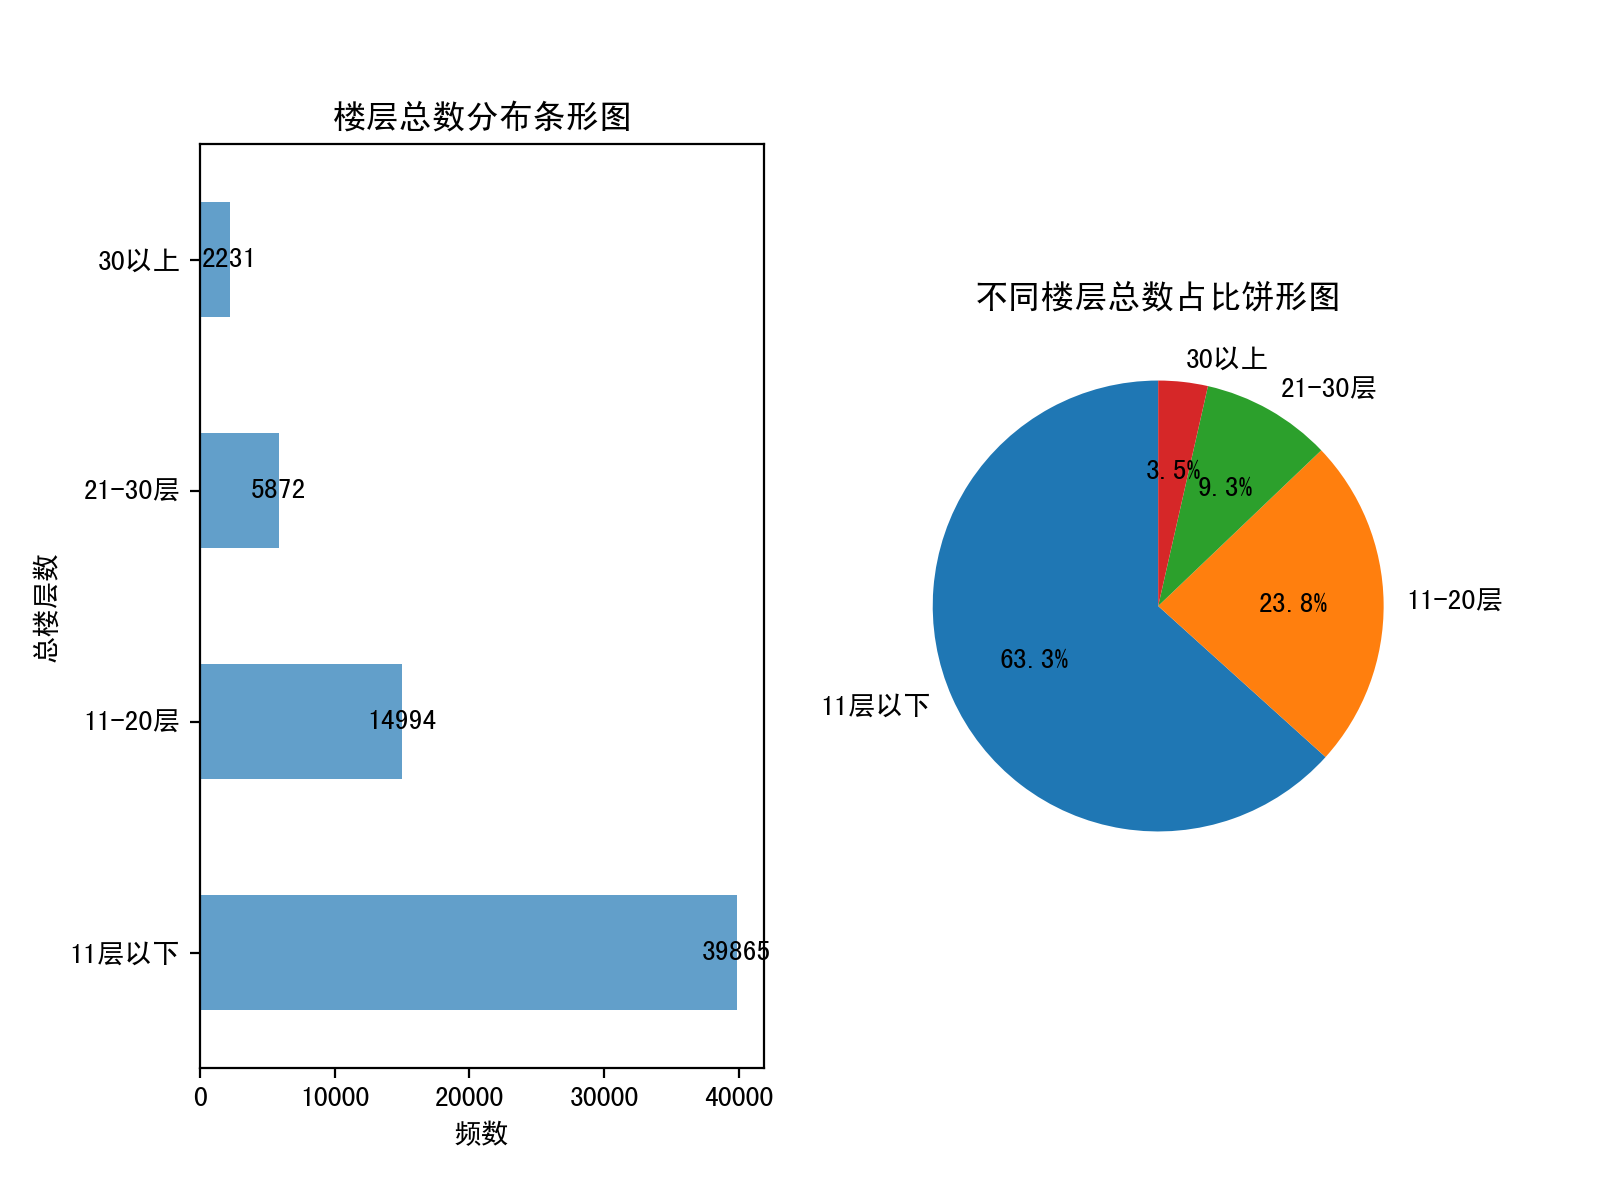

In [8]:
# 处理房源所在楼总层数位置数据：
count_by_floor_number = new_data['总楼层数'].groupby(new_data['总楼层数']).count() # 根据不同楼层数进行分组统计
count_by_floor_number.sort_index(inplace = True) # 按照索引值的大小将分组的结果升序排序

# 根据count_by_floor_number的索引值将数据分成11层以下、11-20层、21-30层和30层以上四组，并分组计数
count_by_floor_number1 = count_by_floor_number.loc[1:10].sum() 
count_by_floor_number2 = count_by_floor_number.loc[10:20].sum() 
count_by_floor_number3 = count_by_floor_number.loc[20:30].sum() 
count_by_floor_number4 = count_by_floor_number.loc[30:].sum()  
new_count_by_floor_number = pd.Series([count_by_floor_number1,count_by_floor_number2,count_by_floor_number3,count_by_floor_number4],
index=['11层以下','11-20层','21-30层','30以上'])
# 绘制房源所在楼不同楼层总数占比饼形图和不同楼层总数频数分布条形图：

# 绘制条形图
fig,axes = plt.subplots(1,2)
new_count_by_floor_number.plot.barh(ax=axes[0],alpha=0.7) # alpha 参数指定图像的透明度
axes[0].set(xlabel='频数',ylabel='总楼层数',title='楼层总数分布条形图') # 设置条形图的标题和坐标轴标签

# 给条形图添加数值标签
x = np.arange(len(new_count_by_floor_number))
y = new_count_by_floor_number.values
for a,b in zip(x,y):
    axes[0].text(x=b-10,y=a,s=b,ha='center', va='center') # ha参数和va参数分别指定数值标签水平时对其与垂直的方式

# 绘制饼形图
new_count_by_floor_number.plot(kind='pie',ax=axes[1],autopct='%.1f%%',startangle=90,label='')
 # autopct参数的作用是指定饼形图中数据标签的显示方式
 # '%.1f%%'表示数据标签的格式是保留一位小数的百分数
 # startangle=90 表示饼图的起始绘制角度是偏离x轴90度，并按逆时针绘制
 # lable=''后，饼形图的左边便不会再显示Series对象的名字

axes[1].set_title('不同楼层总数占比饼形图') # 设置饼形图的标题
axes[1].set_aspect('equal') # 设置饼形图的纵横比相等
plt.savefig('p4.png') # 保存图片

In [9]:
new_data['建造时间'].unique()  # 查看房屋建造时间中的非重复值

array([2011, 1995, 1997, 2006, 2004, 1994, 2005, 2009, 2010, 1999, 2007,
       2003, 2000, 2008, 1996, 2013, 2001, 1990, 2002, 2014, 1998, 2012,
       1993, 1989, 1992, 2015, 1987, 1983, 1991, 2016, 1982, 1986, 1977,
       1988, 1981, 1974, 1980, 1984, 1978, 1985, 1960, 1979, 1975, 1973,
       1976, 1964, 1953, 1969, 1958, 1966, 1954, 1956, 1965, 1963, 1959,
       1972, 1948, 1949, 1936, 1946, 1955, 1967, 1957, 1961, 1970, 1937,
       1950, 1968, 1962, 1933, 1911, 1947, 1935, 1931, 1934, 1939, 1930,
       1912, 1924, 1926, 1932, 1928, 1952, 1922])

<IPython.core.display.Javascript object>


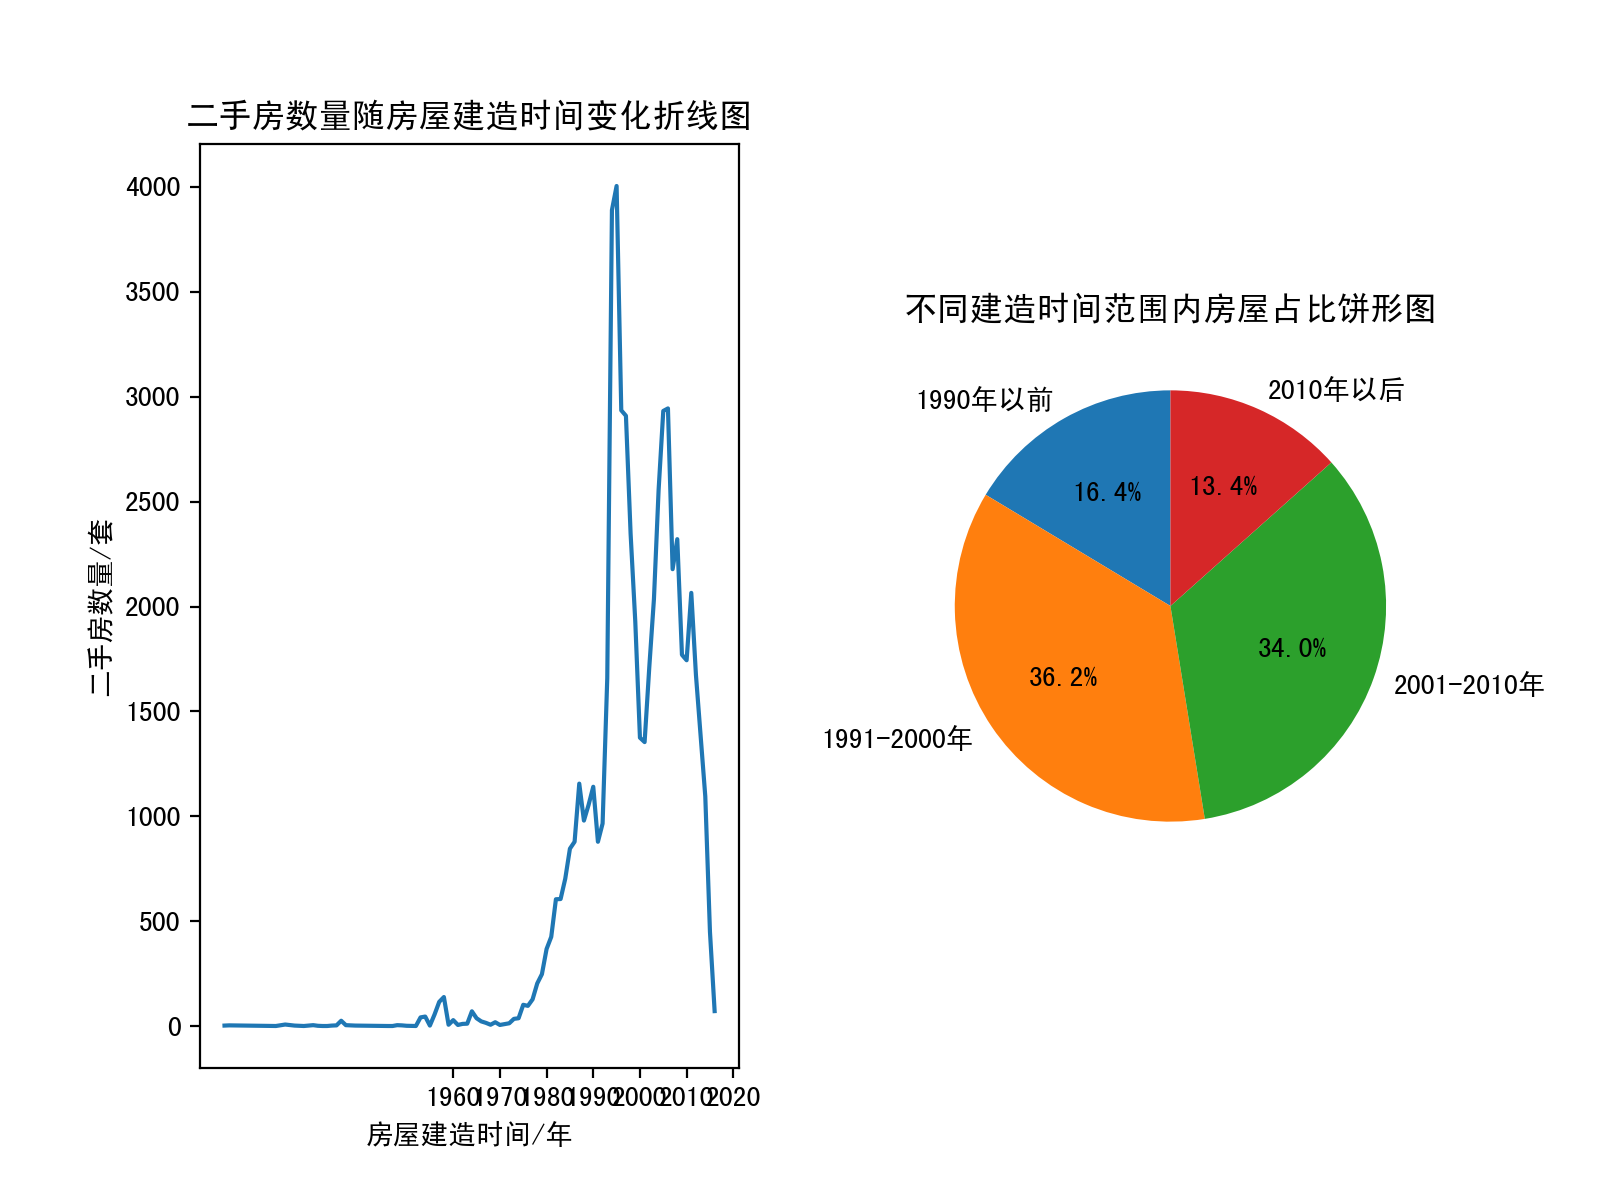

In [10]:
count_by_create_time = new_data['建造时间'].groupby(new_data['建造时间']).count() # 对于不同建造时间的房屋分组统计

# 根据count_by_create_time的索引值将数据分为1990年以前,1991-2000年,2001-2010年,2010年以后以上五组数据，并分组计数
count_by_create_time1 = count_by_create_time.loc[:1990].sum() 
count_by_create_time2 = count_by_create_time.loc[1991:2000].sum() 
count_by_create_time3 = count_by_create_time.loc[2001:2010].sum()  
count_by_create_time4 = count_by_create_time.loc[2010:].sum()  
new_count_by_create_time = pd.Series([count_by_create_time1,count_by_create_time2,count_by_create_time3,count_by_create_time4],
                                      index=['1990年以前','1991-2000年','2001-2010年','2010年以后'])
# 绘制房源所在楼不同楼层总数占比饼形图和不同楼层总数频数分布条形图：

# 绘制折线图
fig,axes = plt.subplots(1,2)
count_by_create_time.plot(kind='line',ax=axes[0]) # alpha 参数指定图像的透明度
axes[0].set(xlabel='房屋建造时间/年',ylabel='二手房数量/套',title='二手房数量随房屋建造时间变化折线图',
            xticks=[1960,1970,1980,1990,2000,2010 ,2020]) # 设置折线图的标题和坐标轴标签

# 绘制饼形图
new_count_by_create_time.plot(kind='pie',ax=axes[1],autopct='%.1f%%',startangle=90,label='')
 # autopct参数的作用是指定饼形图中数据标签的显示方式
 # '%.1f%%'表示数据标签的格式是保留一位小数的百分数
 # startangle=90 表示饼图的起始绘制角度是偏离x轴90度，并按逆时针绘制
 # lable=''后，饼形图的左边便不会再显示Series对象的名字

axes[1].set_title('不同建造时间范围内房屋占比饼形图') # 设置饼形图的标题
axes[1].set_aspect('equal') # 设置饼形图的纵横比相等
plt.subplots_adjust(wspace=0.3) # 设置figure对象中子图的间距
plt.savefig('p5.png') # 保存图片

In [11]:
new_data['建筑面积'].describe() # 查看房屋建筑面积的统计信息

count    61538.000000
mean        85.254819
std         43.119718
min         11.800000
25%         55.520000
50%         77.230000
75%        102.100000
max       1041.310000
Name: 建筑面积, dtype: float64

<IPython.core.display.Javascript object>


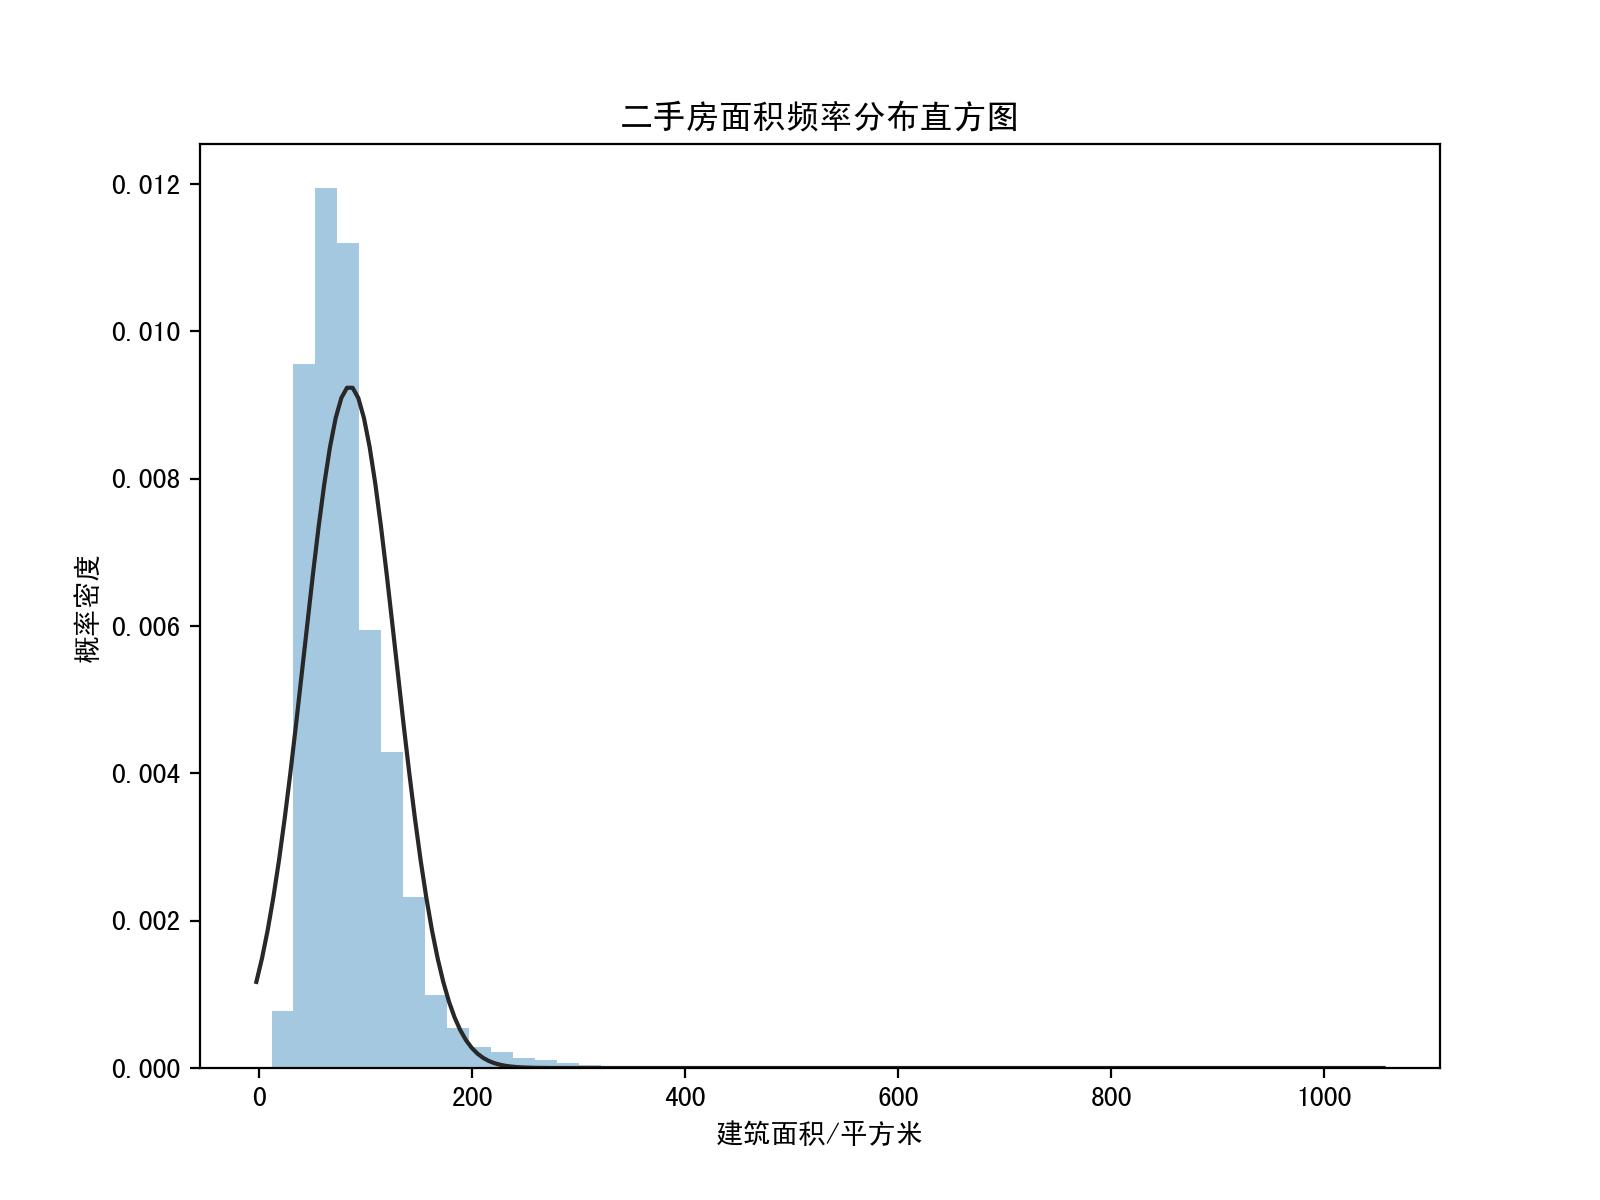

/Users/stan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [12]:
# 绘制整体房源面积的频率直方图
from scipy.stats import norm #导入标准正态包
fig,axes = plt.subplots()
sns.distplot(new_data['建筑面积'],bins=50,kde=False,fit=norm,ax=axes) #？？？ fit=norm意味着用正太分布密度函数拟合频率分布直方图。
axes.set(xlabel='建筑面积/平方米',ylabel='概率密度',title='二手房面积频率分布直方图') # 设置直方图的x、y轴标签以及直方图的标签

plt.savefig('p6.png') # 指定图片的分辨率并保存图片

In [13]:
min_area = new_data['建筑面积'].mean() - new_data['建筑面积'].std()
max_area = new_data['建筑面积'].mean() + new_data['建筑面积'].std()
print(min_area,max_area)

42.135101717138205 128.3745368801537


In [14]:
new_data['总价'].describe()  # 查看二手房总价的统计信息

count    61538.000000
mean       484.106310
std        389.071322
min         33.000000
25%        268.000000
50%        368.000000
75%        560.000000
max       9500.000000
Name: 总价, dtype: float64

In [15]:
new_data['单价'].describe()

count     61538.000000
mean      55797.524359
std       21136.555260
min        7463.000000
25%       40386.000000
50%       53271.000000
75%       67158.000000
max      199005.000000
Name: 单价, dtype: float64

<IPython.core.display.Javascript object>


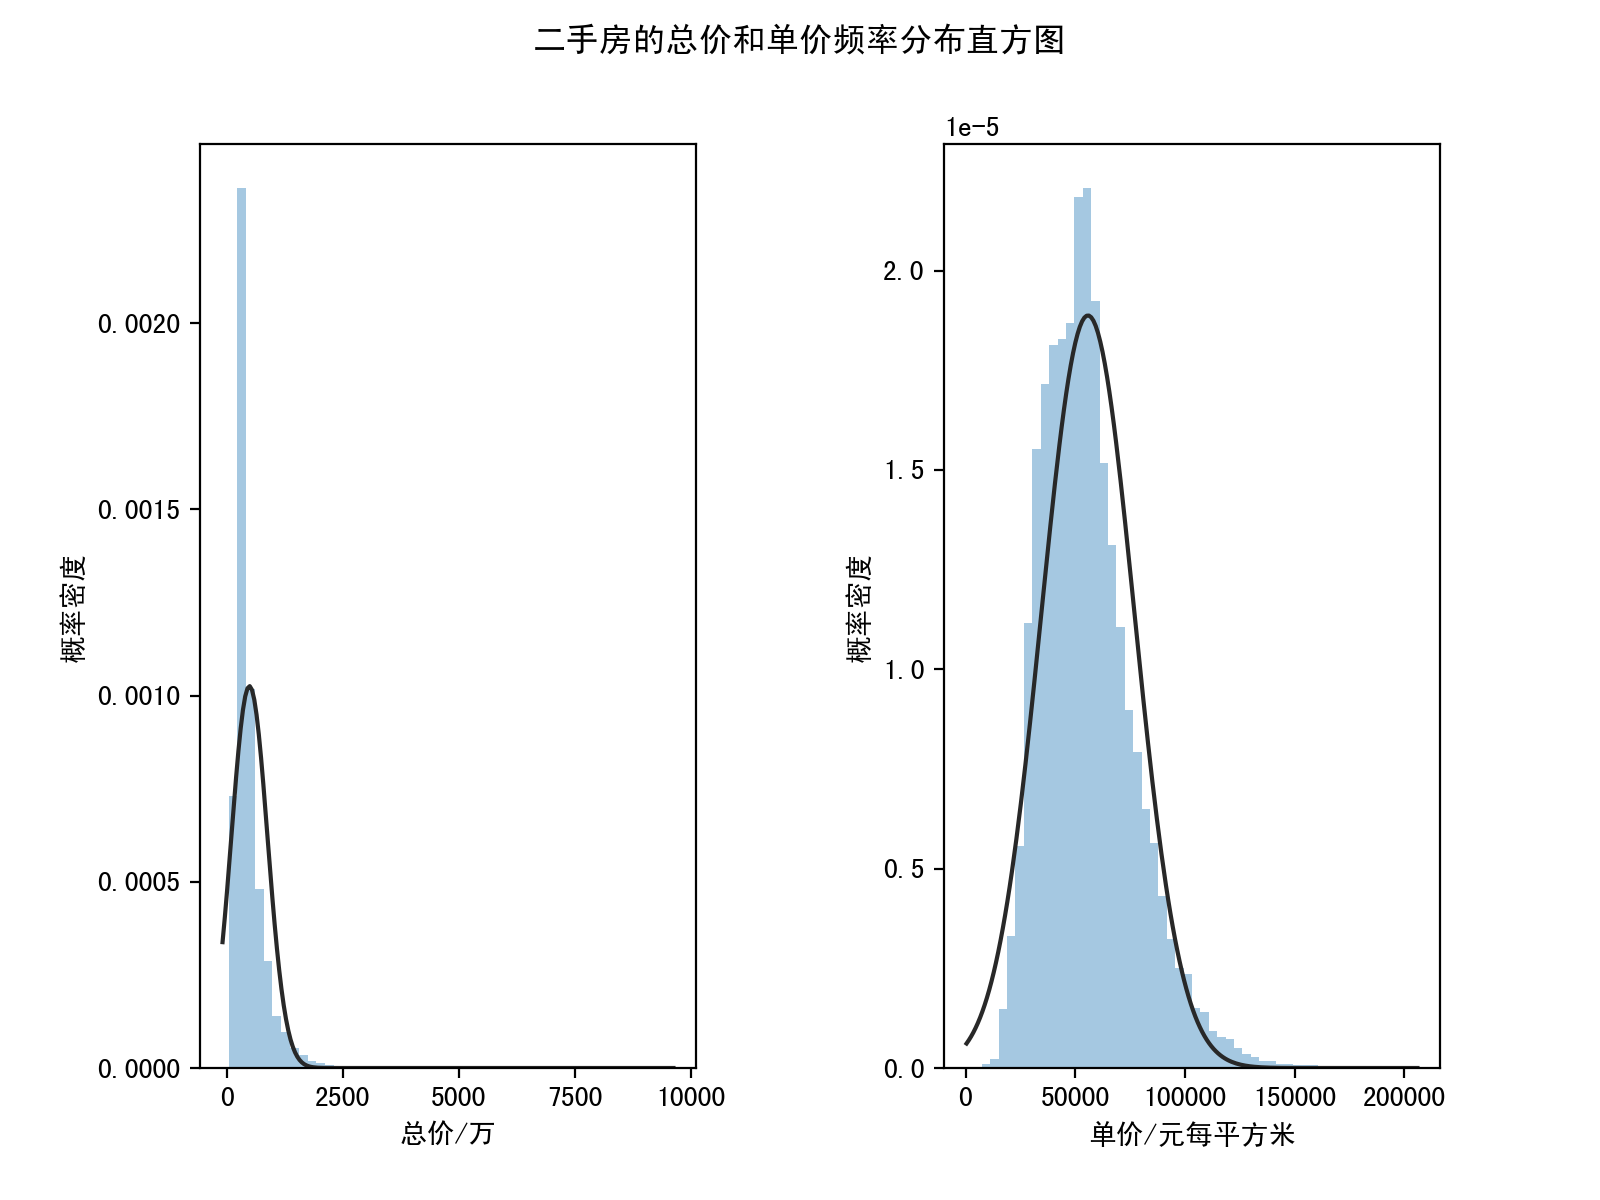

/Users/stan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/stan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [16]:
# 绘制整体房源的总价分布直方图和单价分布直方图：
fig,axes = plt.subplots(1,2)
sns.distplot(new_data['总价'],bins=50,kde=False,fit=norm,ax=axes[0])
sns.distplot(new_data['单价'],bins=50,kde=False,fit=norm,ax=axes[1])

# 设置直方图的x轴标签、y轴标签以及直方图的标题
axes[0].set(xlabel='总价/万',ylabel='概率密度')
axes[1].set(xlabel='单价/元每平方米',ylabel='概率密度')

fig.suptitle('二手房的总价和单价频率分布直方图')
plt.subplots_adjust(wspace=0.5) # 设置figure对象中两个子图的间距
plt.savefig('p7.png') # 保存图片

In [17]:
min_price = new_data['总价'].mean() - new_data['总价'].std()
max_price = new_data['总价'].mean() + new_data['总价'].std()
print(min_price,max_price)

95.03498836040671 873.1776314842415


In [18]:
min_average_price = new_data['单价'].mean() - new_data['单价'].std()
max_average_price = new_data['单价'].mean() + new_data['单价'].std()
print(min_average_price,max_average_price)

34660.969099270325 76934.07961859506


<IPython.core.display.Javascript object>


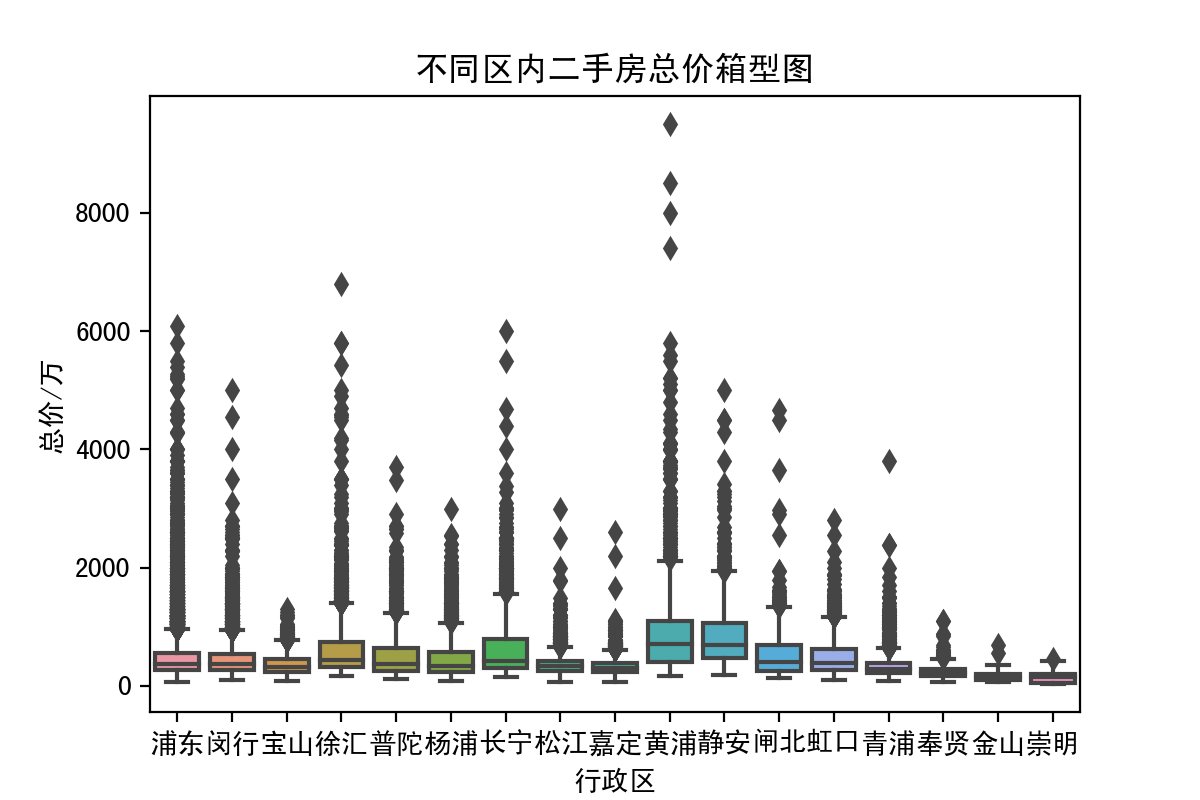

In [19]:
# 首先比较不同行政区内二手房的售价：
fig,axes = plt.subplots(figsize=(6,4))
sns.boxplot(x='行政区',y='总价',data=new_data,orient='v',ax=axes)

axes.set(ylabel='总价/万',title='不同区内二手房总价箱型图')
plt.savefig('p8.png') # 保存图片

<IPython.core.display.Javascript object>


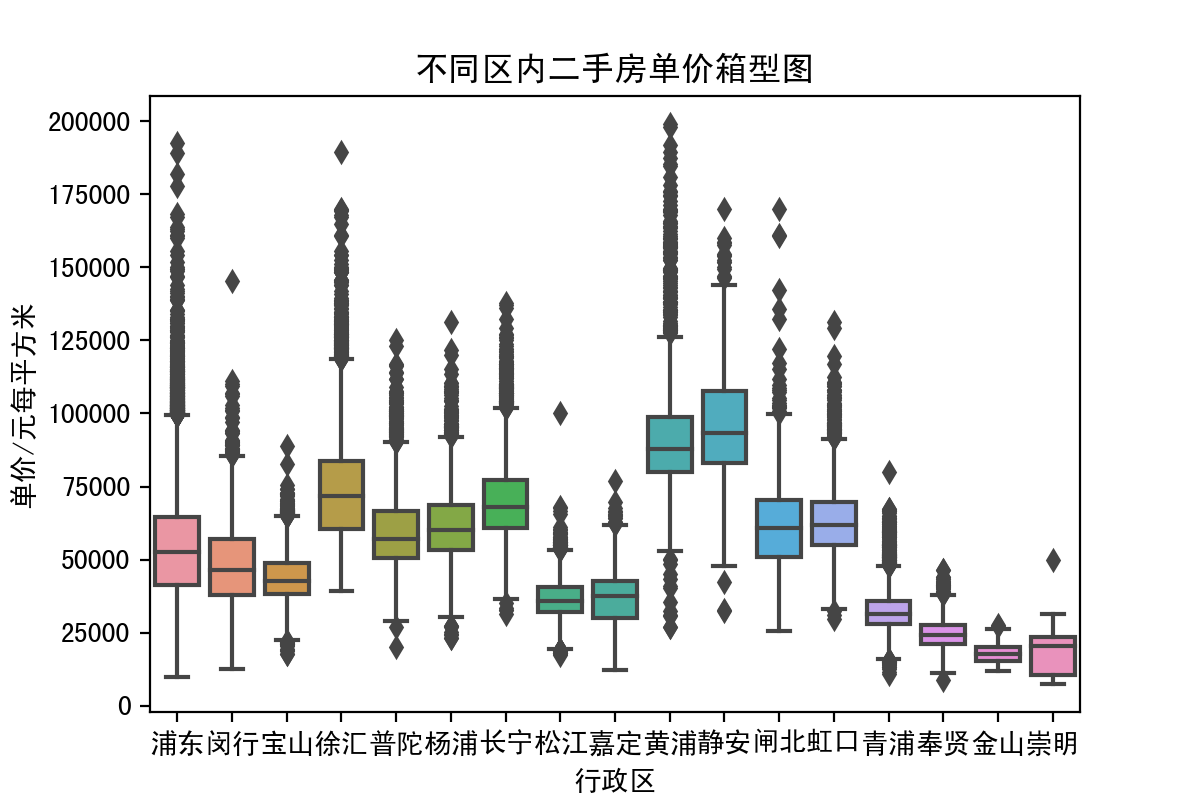

In [20]:
fig,axes = plt.subplots(figsize=(6,4))
sns.boxplot(x='行政区',y='单价',data=new_data,orient='v',ax=axes)

axes.set(ylabel='单价/元每平方米',title='不同区内二手房单价箱型图')
plt.savefig('p9.png') # 保存图片

<IPython.core.display.Javascript object>


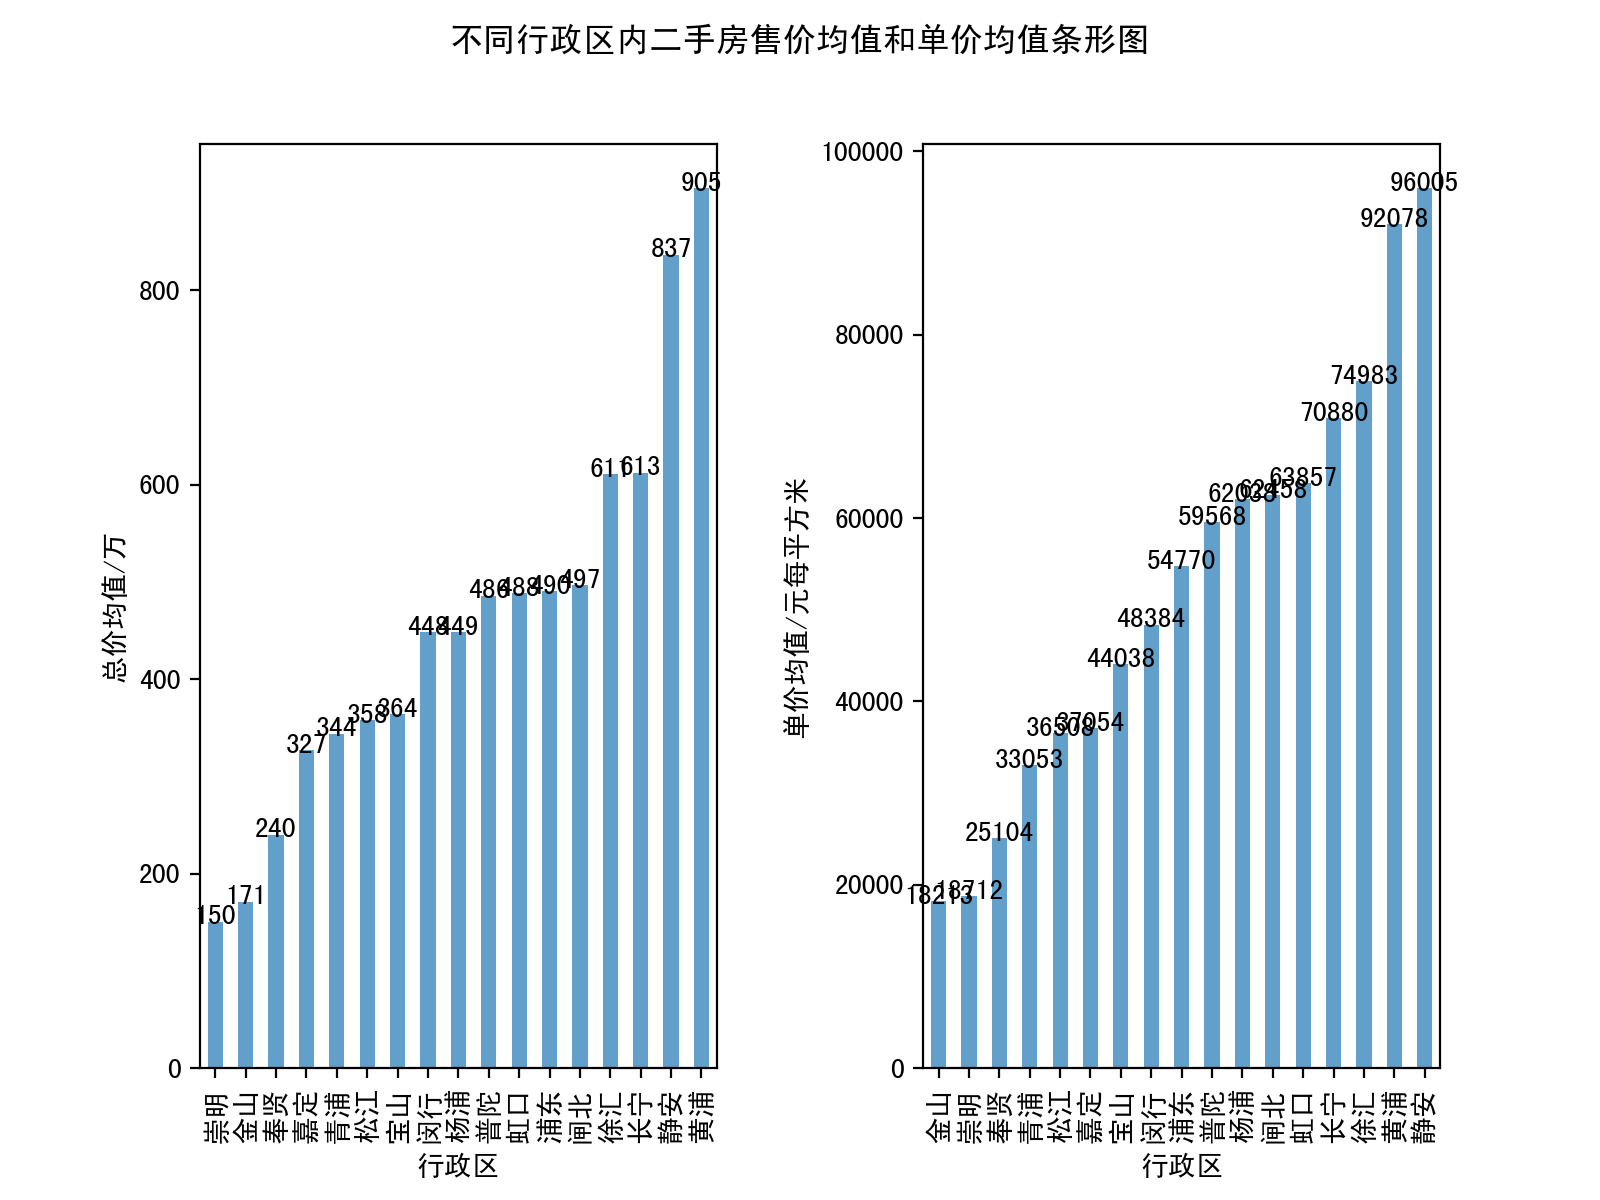

In [21]:
# 计算处于不同行政区的二手房总价的均值：
average_price_grouped_by_region = new_data['总价'].groupby(new_data['行政区']).mean()   # 计算处于不同区的二手房售价的均值
average_price_grouped_by_region.sort_values(ascending=True,inplace=True)   # 将计算结果按照升序排序
 
# 计算处于不同行政区的二手房单价的均值：
average_unit_price_grouped_by_region = new_data['单价'].groupby(new_data['行政区']).mean()   # 计算处于不同区的二手房售价的均值
average_unit_price_grouped_by_region.sort_values(ascending=True,inplace=True)   # 将计算结果按照升序排序
 
# 绘制不同区的二手房总价均值和单价均值条形图：
fig,axes = plt.subplots(1,2)
 
# 绘制售价均值条形图1
average_price_grouped_by_region.plot.bar(ax=axes[0],alpha=0.7)
axes[0].set(ylabel='总价均值/万')
 
# 给条形图1添加数值标签
x1 = np.arange(len(average_price_grouped_by_region))
y1 = average_price_grouped_by_region.values
for a,b in zip(x1,y1):
    axes[0].text(x=a,y=b+5,s='%.f'%b,ha='center', va= 'center') # ha参数和va参数分别指定数值标签水平对齐与垂直对齐的方式
 
# 绘制售价均值条形图2
average_unit_price_grouped_by_region.plot.bar(ax=axes[1],alpha=0.7)
axes[1].set(ylabel='单价均值/元每平方米')
 
# 给条形图2添加数值标签
x2 = np.arange(len(average_unit_price_grouped_by_region))
y2 = average_unit_price_grouped_by_region.values
for c,d in zip(x2,y2):
    axes[1].text(x=c,y=d+500,s='%.f'%d,ha='center', va= 'center')
 
fig.suptitle('不同行政区内二手房售价均值和单价均值条形图')
plt.subplots_adjust(wspace=0.4)   # 设置figure对象中两子图的间距
plt.savefig('p10.png',dpi=300)   # 指定生成图片的分辨率并保存图片

In [22]:
# 找出七个区范围内二手房单价均值最高的前七个地区
seven_highest_unit_price_all = new_data['单价'].groupby(new_data['地区']).mean().sort_values(ascending=False).iloc[:10]

# 找出徐汇区范围内二手房单价最高的前十个地区
changed_data = new_data.set_index(['行政区']) # 将new_data中的所在地区这一列指定为新数据的索引
data_of_xuhui = changed_data.loc['徐汇'] # 筛选出徐汇区的数据
# 筛选出房价最高的前十个地区
seven_highest_unit_price_xuhui = data_of_xuhui['单价'].groupby(data_of_xuhui['地区']).mean().sort_values(ascending=False).iloc[:10]

print(list(seven_highest_unit_price_all.index))
print(list(seven_highest_unit_price_xuhui.index))

['新天地', '黄浦滨江', '衡山路', '建国西路', '淮海中路', '南京西路', '徐汇滨江', '联洋', '世博滨江', '人民广场']
['衡山路', '建国西路', '徐汇滨江', '徐家汇', '斜土路', '万体馆', '田林', '龙华', '康健', '漕河泾']


<IPython.core.display.Javascript object>


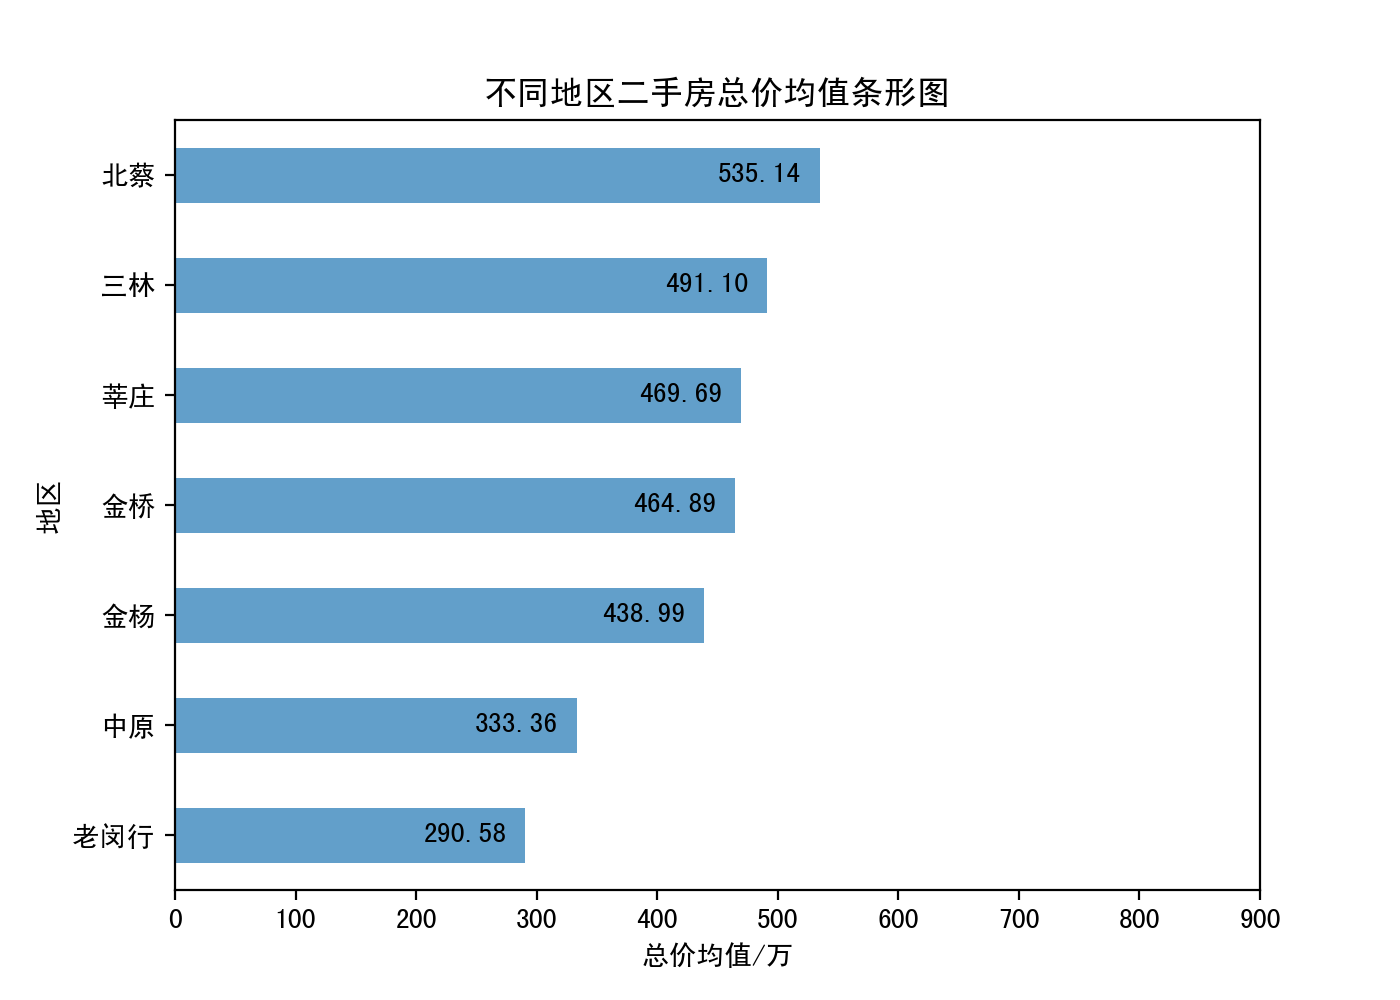

In [23]:
#先看具体地区对价格的影响：
count_by_location = new_data['地区'].groupby(new_data['地区']).count() # 按照房源所处地区进行分组计数
count_by_location.sort_values(ascending=True,inplace=True) # 把计数结果按照升序排序
new_count_by_location = count_by_location[count_by_location > 1000] # 选出房源数量在1000套以上的地区
#计算不同地区二手房总价的均值
locations1 = list(new_count_by_location.index) # locations1代表的是房源数量在1000套以上的地区
average_price_grouped_by_location = new_data['总价'].groupby(new_data['地区']).mean() # 计算不同地区的二手房总价的平均值
new_average_price_grouped_by_location = average_price_grouped_by_location[locations1] # 筛选出房源数量在1000套以上的房屋总价均值
new_average_price_grouped_by_location.sort_values(ascending=True,inplace=True) # 把筛选出来的数据结果按照升序排序
#绘制不同地区二手房总价均值的条形分布图：
fig,axes=plt.subplots(figsize=(7,5))
new_average_price_grouped_by_location.plot.barh(ax=axes,alpha=0.7)
axes.set(xlabel='总价均值/万',ylabel='地区',title='不同地区二手房总价均值条形图',
       xticks=[0,100,200,300,400,500,600,700,800,900])
#给条形图议添加数值标签
x = np.arange(len(new_average_price_grouped_by_location))
y = new_average_price_grouped_by_location.values
for a,b in zip(x,y):
   axes.text(x=b-50,y=a,s='%.2f'%b,ha='center',va='center')
plt.savefig('p11.png') # 保存图片

<IPython.core.display.Javascript object>


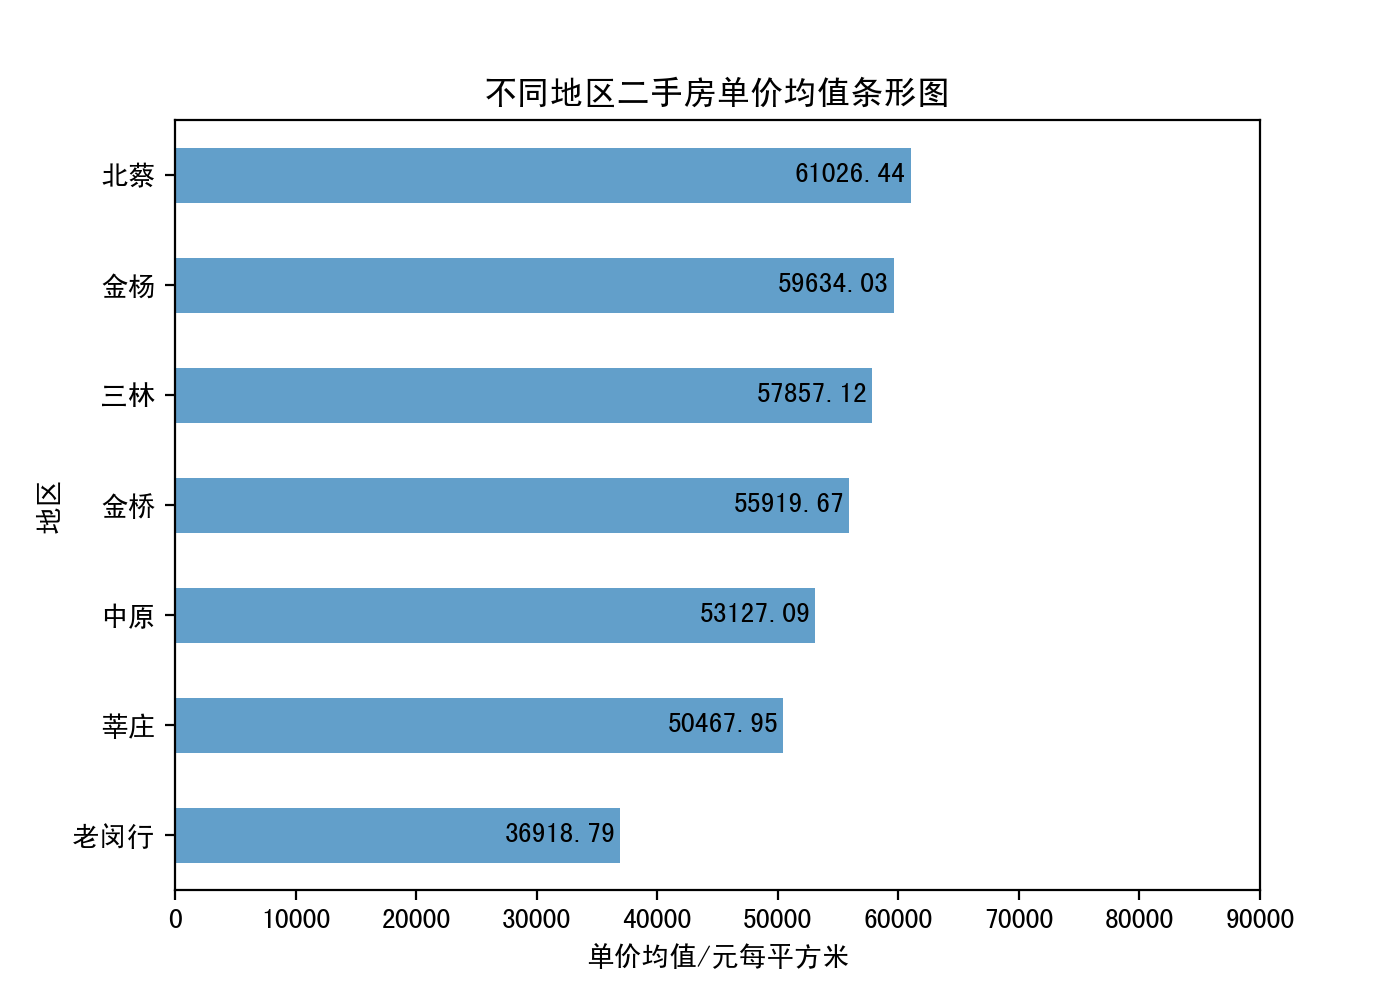

In [24]:
#计算不同地区二手房单价的均值：
average_unit_price_grouped_by_location = new_data['单价'].groupby(new_data['地区']).mean() # 计算不同地区的二手房单价的平均值
new_average_unit_price_grouped_by_location = average_unit_price_grouped_by_location[locations1] # 筛选出房源数量在1000套以上的房屋单价均值
new_average_unit_price_grouped_by_location.sort_values(ascending=True,inplace=True) # 把筛选出来的数据结果按照升序排序

#绘制不同地区二手房单价均值的条形分布图：
fig,axes=plt.subplots(figsize=(7,5))
new_average_unit_price_grouped_by_location.plot.barh(ax=axes,alpha=0.7)
axes.set(xlabel='单价均值/元每平方米',ylabel='地区',title='不同地区二手房单价均值条形图',
        xticks=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000])

#给条形图议添加数值标签
x = np.arange(len(new_average_unit_price_grouped_by_location))
y = new_average_unit_price_grouped_by_location.values 
for a,b in zip(x,y):
    axes.text(x=b-5000,y=a,s='%.2f'%b,ha='center',va='center')# 生疏
plt.savefig('p12.png') # 保存图片

In [25]:
new_count_by_orientation

朝向
南      49423
南 北     7494
东南      1165
其他      3456
Name: 朝向, dtype: int64

<IPython.core.display.Javascript object>


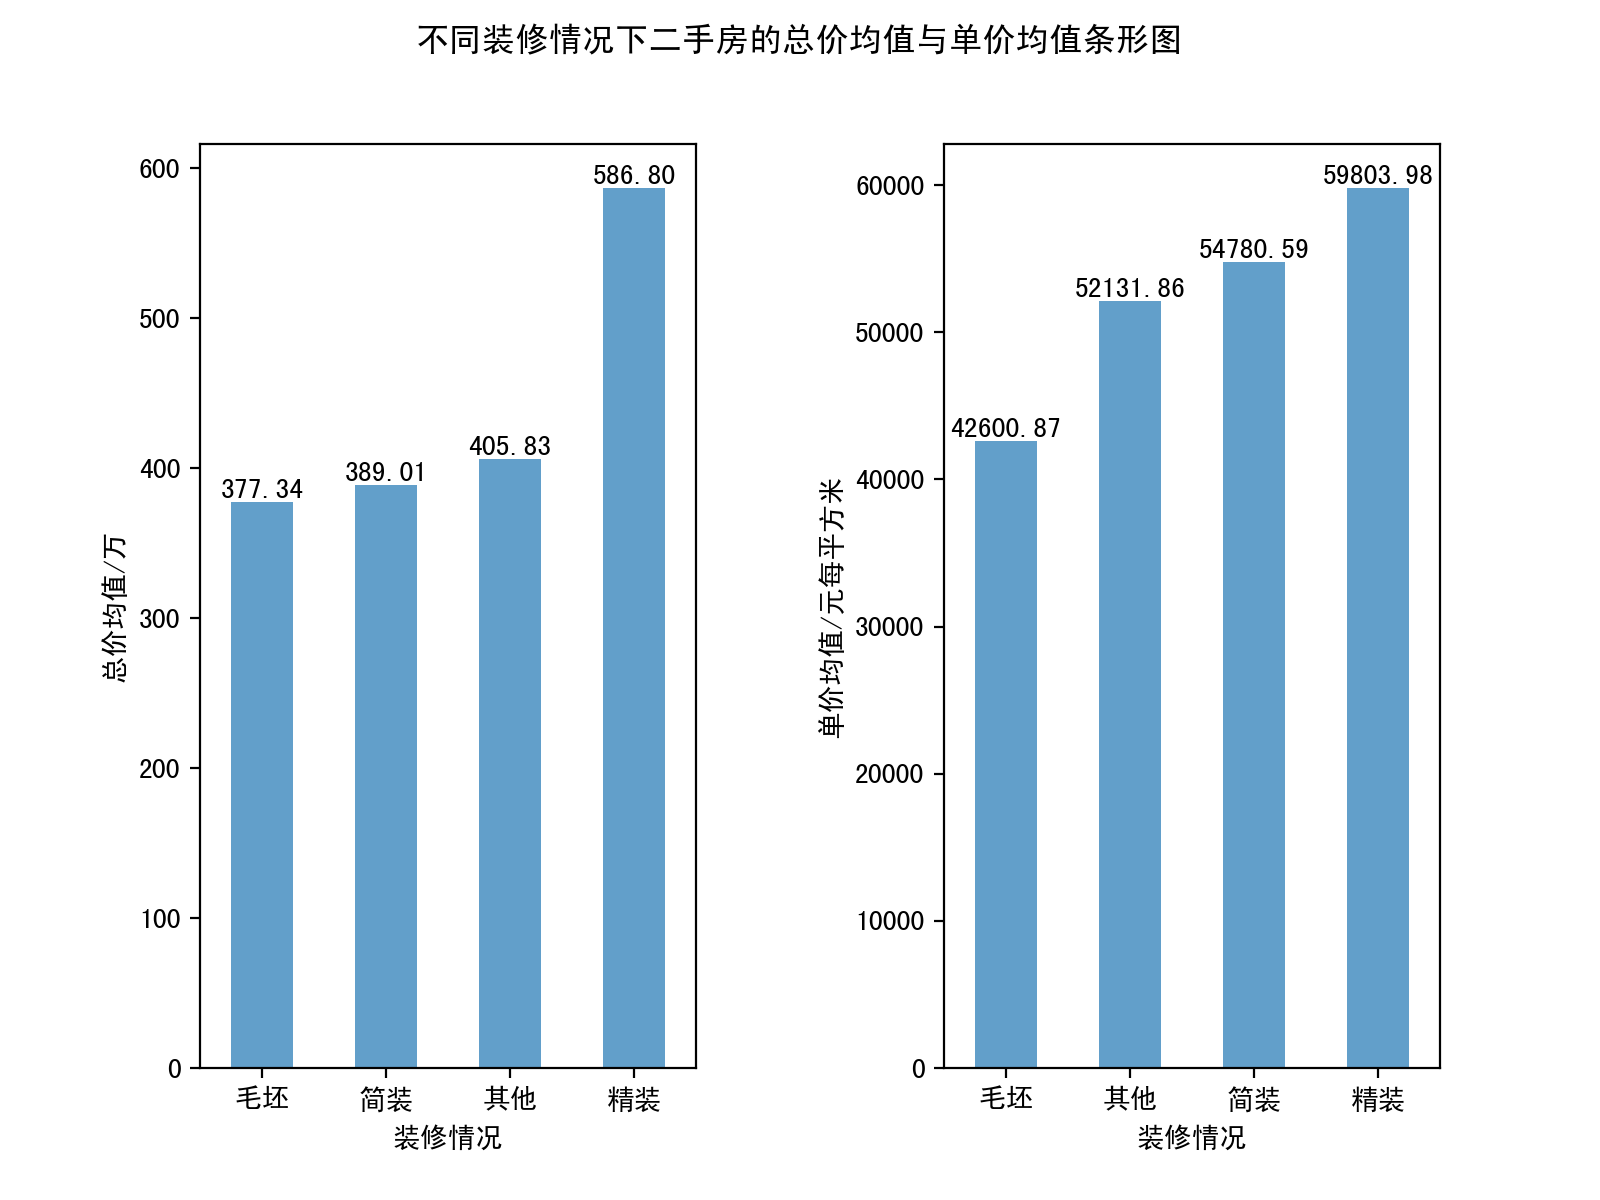

In [26]:
# 查看房屋装修情况对价格的影响：
average_price_grouped_by_decoration = new_data['总价'].groupby(new_data['装修情况']).mean() # 计算不同装修的二手房总价的平均值
average_price_grouped_by_decoration.sort_values(ascending=True,inplace=True) # 把筛选出来的数据结果按照升序排序

average_unit_price_grouped_by_decoration = new_data['单价'].groupby(new_data['装修情况']).mean() # 计算不同装修的二手房总价的平均值
average_unit_price_grouped_by_decoration.sort_values(ascending=True,inplace=True) # 把筛选出来的数据结果按照升序排序

#绘制不同装修的二手房总价均值与单价均值的条形分布图：
fig,axes=plt.subplots(1,2)

# 绘制总价均值条形图
average_price_grouped_by_decoration.plot.bar(ax=axes[0],alpha=0.7,rot=0)
axes[0].set(ylabel='总价均值/万')

# 绘制单价均值条形图
average_unit_price_grouped_by_decoration.plot.bar(ax=axes[1],alpha=0.7,rot=0)
axes[1].set(ylabel='单价均值/元每平方米')

# 写一个给条形图添加数据标签的函数
def add_data_label(data_name,axes):
    x = np.arange(len(data_name))
    y = data_name.values
    for a,b in zip(x,y):
        axes.text(x=a,y=b,s='%.2f'%b,ha='center',va='bottom')
    
# 给条形图添加数据标签
add_data_label(average_price_grouped_by_decoration,axes[0])
add_data_label(average_unit_price_grouped_by_decoration,axes[1])

fig.suptitle('不同装修情况下二手房的总价均值与单价均值条形图') #多标题
plt.subplots_adjust(wspace=0.5) # 子图间距
plt.savefig('p13.png') # 保存图片

<IPython.core.display.Javascript object>


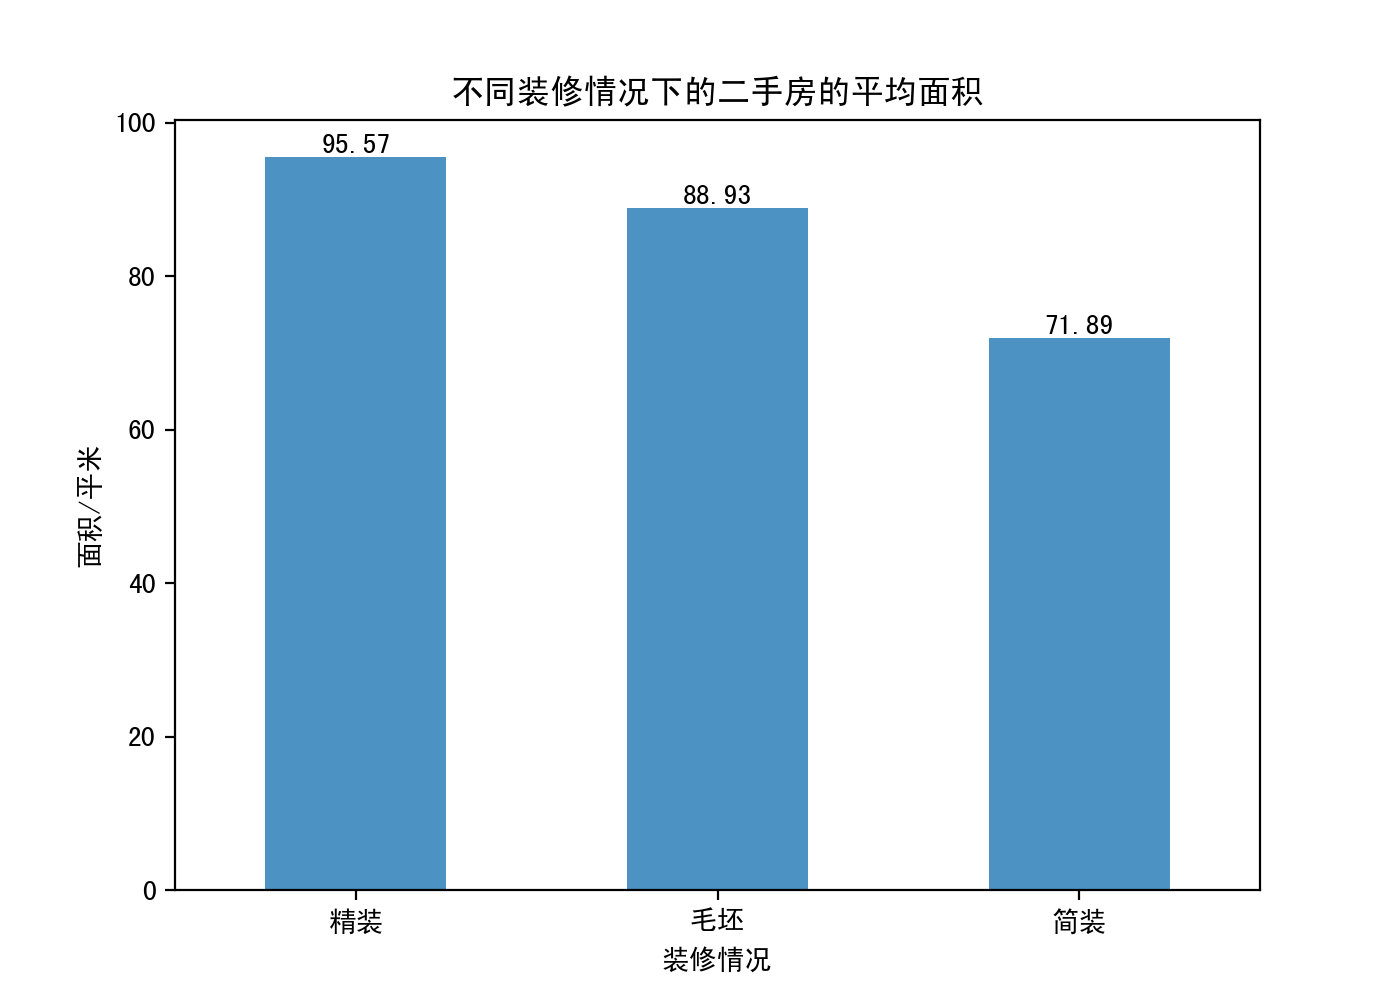

In [27]:
# 准备数据
average_area_grouped_by_decoration1 = new_data['建筑面积'].groupby(new_data['装修情况']).mean()
average_area_grouped_by_decoration2 = average_area_grouped_by_decoration1[1:]  # 筛选出毛坯房、简装房和精装房这三者的数据
average_area_grouped_by_decoration3 = average_area_grouped_by_decoration2.sort_values(ascending=False)  # 将筛选出来的数据按照降序排序
new_average_area_grouped_by_decoration = average_area_grouped_by_decoration3
 
# 绘制条形图
fig,axes = plt.subplots(figsize=(7,5))
new_average_area_grouped_by_decoration.plot.bar(ax=axes,alpha=0.8,rot=0)
axes.set(ylabel='面积/平米',title='不同装修情况下的二手房的平均面积')
         
# 调用add_data_label函数给条形图添加数据标签       
add_data_label(new_average_area_grouped_by_decoration,axes)
plt.savefig('p14.png') # 保存图片

<IPython.core.display.Javascript object>


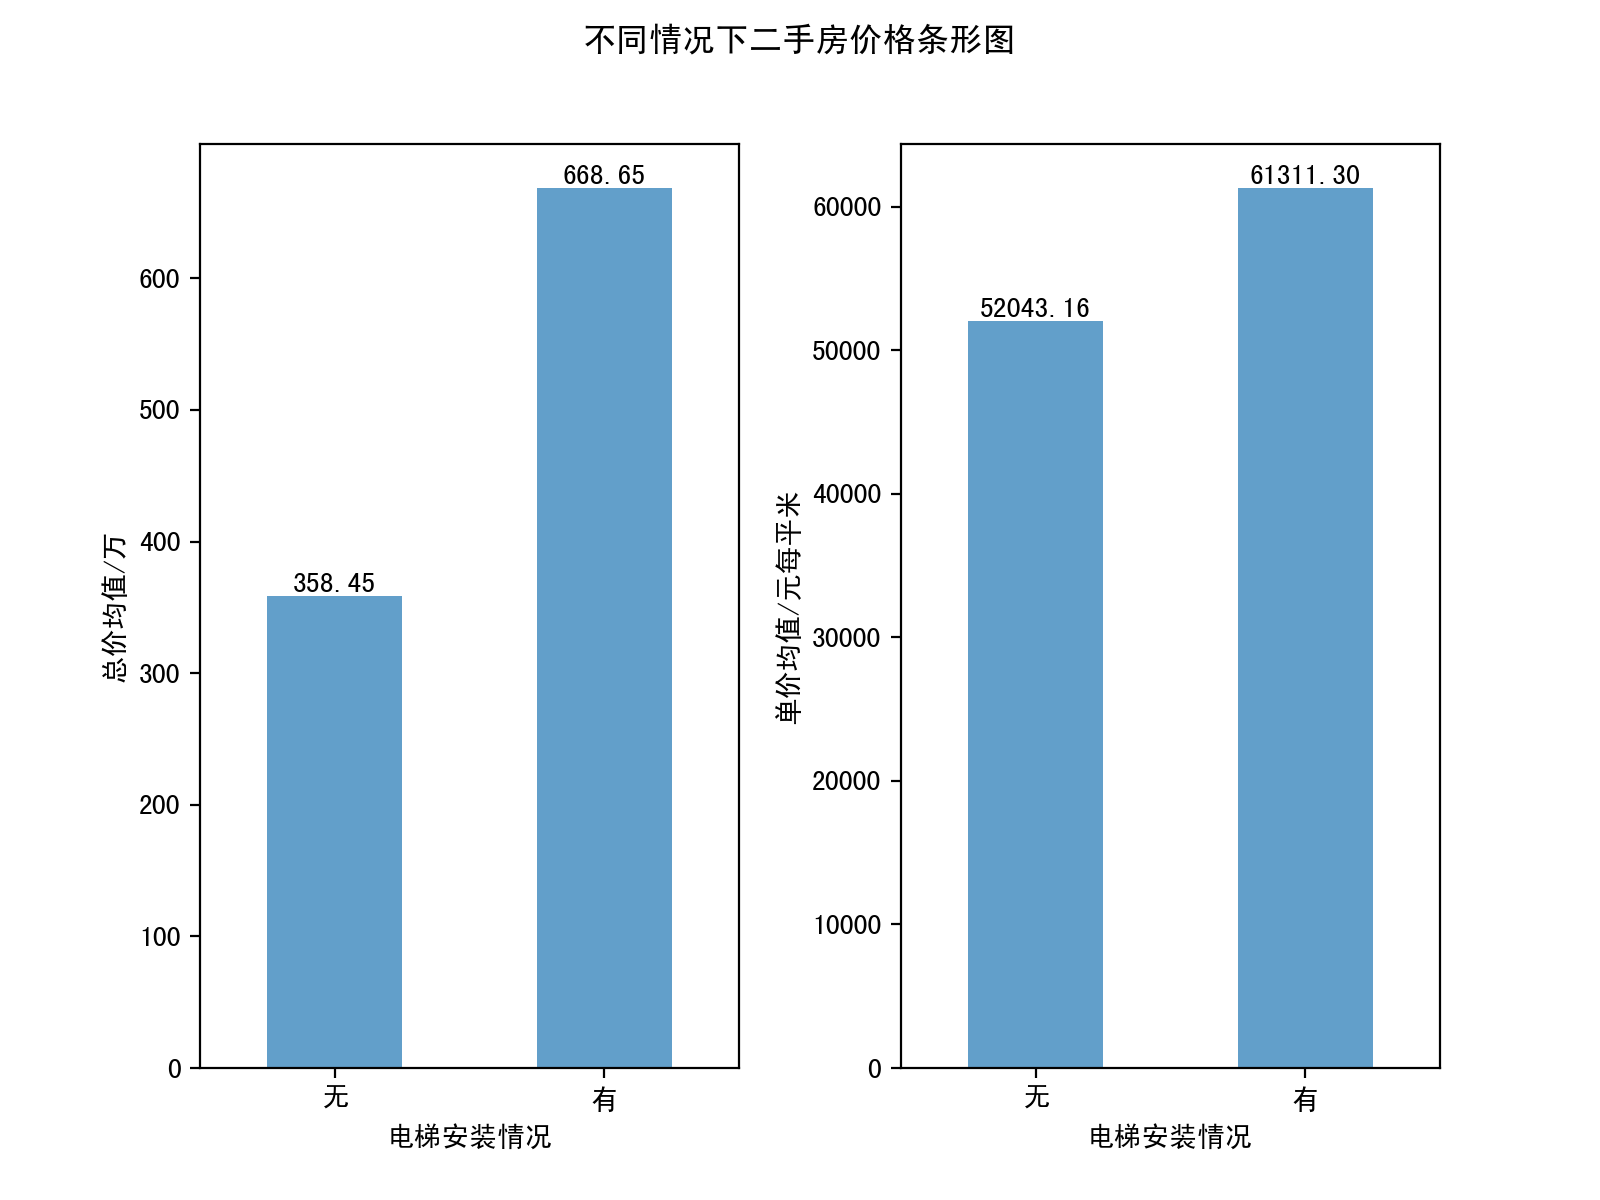

In [28]:
average_price_grouped_by_elevator = new_data['总价'].groupby(new_data['配备电梯']).mean()
average_unit_price_grouped_by_elevator = new_data['单价'].groupby(new_data['配备电梯']).mean()
 

# 绘制描述电梯房源所在楼的安装情况与房源对房价影响的价格分布条形图
fig,axes = plt.subplots(1,2)
 
# 绘制关于电梯安装情况的房价条形分布图
average_price_grouped_by_elevator.plot.bar(ax=axes[0],alpha=0.7,rot=0)
average_unit_price_grouped_by_elevator.plot.bar(ax=axes[1],alpha=0.7,rot=0)
axes[0].set(xlabel='电梯安装情况',ylabel='总价均值/万',yticks=[0,100,200,300,400,500,600])
axes[1].set(xlabel='电梯安装情况',ylabel='单价均值/元每平米',yticks=[0,10000,20000,30000,40000,50000,60000])
 

# 依次给四个条形图添加上数据标签
add_data_label(average_price_grouped_by_elevator,axes[0])
add_data_label(average_unit_price_grouped_by_elevator,axes[1])

 
fig.suptitle('不同情况下二手房价格条形图')
plt.subplots_adjust(wspace=0.3,hspace=0.5)   # 设置子图的间距
plt.savefig('p15.png')    # 保存图片

<IPython.core.display.Javascript object>


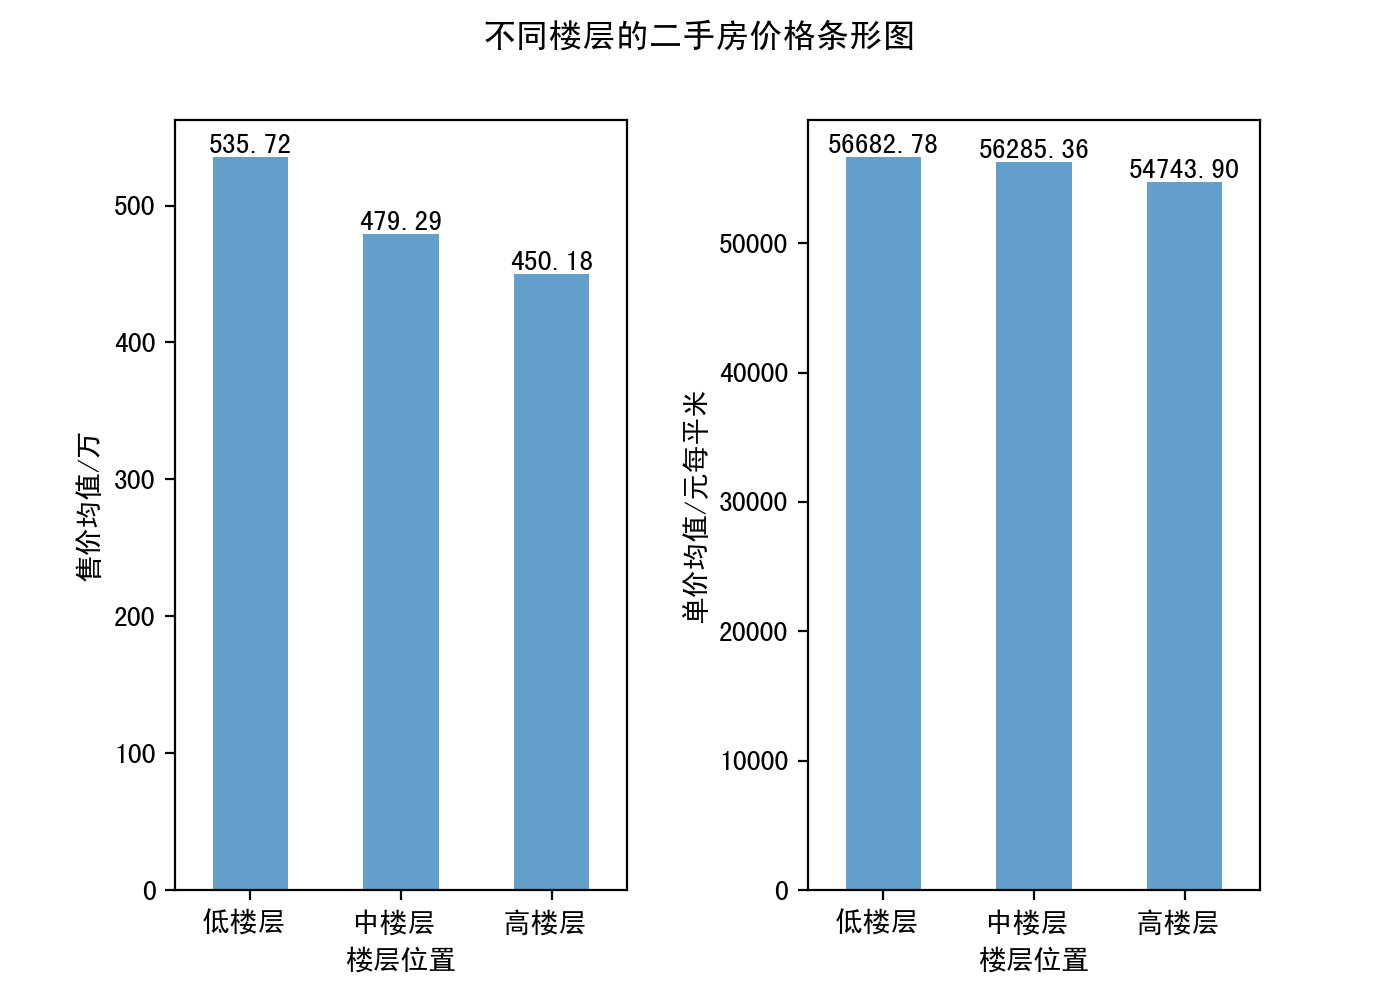

In [29]:
# 查看房屋所属楼层对价格的影响
average_price_groued_by_floor_location = new_data['总价'].groupby(new_data['楼层']).mean()  # 计算位于不同楼层的二手房的总价均值
average_price_groued_by_floor_location.sort_values(ascending=False,inplace=True)
average_unit_price_groued_by_floor_location = new_data['单价'].groupby(new_data['楼层']).mean() # 房屋所处的楼层位置对单价的影响
average_unit_price_groued_by_floor_location.sort_values(ascending=False,inplace=True)
 
# 绘制处于不同楼层的二手房价格的条形分布图
fig,axes = plt.subplots(1,2,figsize=(7,5))
average_price_groued_by_floor_location.plot.bar(ax=axes[0],alpha=0.7,rot=0)
average_unit_price_groued_by_floor_location.plot.bar(ax=axes[1],alpha=0.7,rot=0)
 
axes[0].set(xlabel='楼层位置',ylabel='售价均值/万')
axes[1].set(xlabel='楼层位置',ylabel='单价均值/元每平米')
 
# 调用add_data_label函数给条形图添加数据标签
add_data_label(average_price_groued_by_floor_location,axes[0])
add_data_label(average_unit_price_groued_by_floor_location,axes[1])
 
fig.suptitle('不同楼层的二手房价格条形图')   # 设置figure对象的标题
plt.subplots_adjust(wspace=0.4)     # 设置figure对象中子图的间距
plt.savefig('p16.png')      # 保存图片

<IPython.core.display.Javascript object>


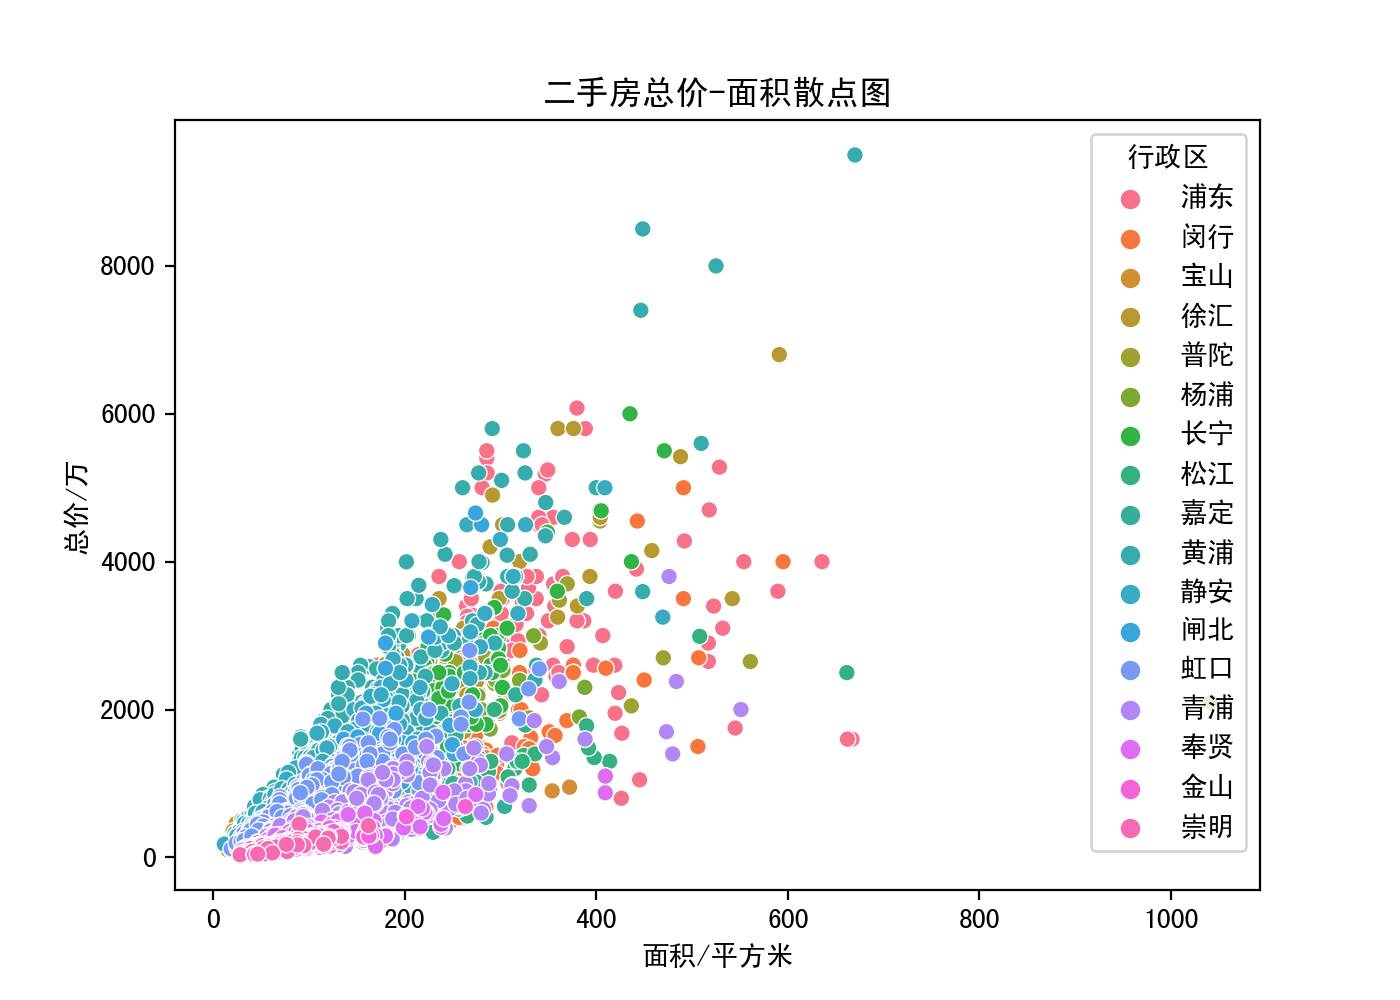

In [30]:
# 先看整体范围内，二手房面积—总价散点图
fig,axes = plt.subplots(figsize=(7,5))
sns.scatterplot(x='建筑面积',y='总价',hue='行政区',data=new_data,ax=axes)
axes.set(xlabel='面积/平方米',ylabel='总价/万',title='二手房总价-面积散点图')
plt.savefig('p17.png') # 保存图片

In [31]:
# 计算总价和面积的相关系数
correlation_coefficient_between_price_and_area = new_data['总价'].corr(new_data['建筑面积'])
 
# 计算单价和面积的相关系数
correlation_coefficient_between_price_and_unit_area = new_data['单价'].corr(new_data['建筑面积'])
 
print(correlation_coefficient_between_price_and_area,correlation_coefficient_between_price_and_unit_area)

0.7772974377455992 0.09227417288399921


<IPython.core.display.Javascript object>


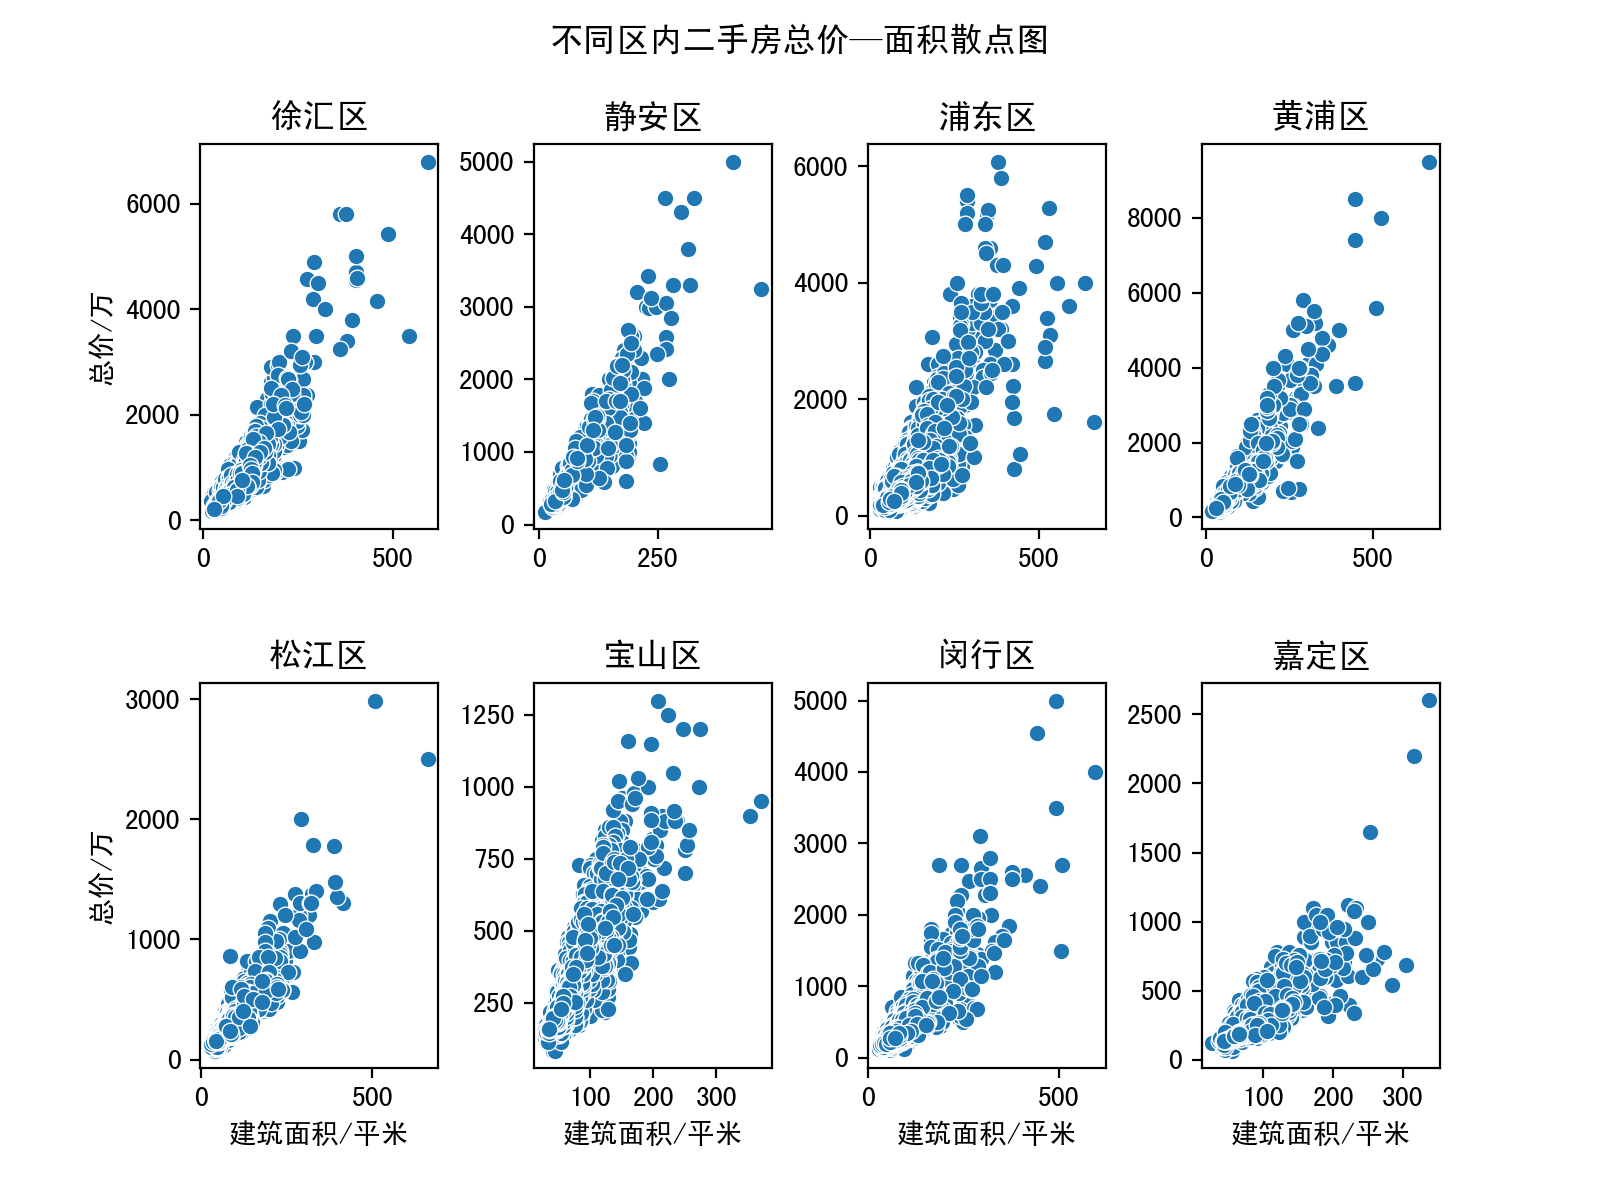

In [32]:
# 分别绘制七个区内二手房总价——面积散点图
df = new_data.set_index(['行政区'])   # 将new_data中的所在区这一列指定为索引
 
# 根据索引筛选出八个不同区的售价与面积数据
xuhui = df.loc['徐汇'][['总价','单价','建筑面积']]
jingan = df.loc['静安'][['总价','单价','建筑面积']]
pudong = df.loc['浦东'][['总价','单价','建筑面积']]
huangpu = df.loc['黄浦'][['总价','单价','建筑面积']]
songjiang = df.loc['松江'][['总价','单价','建筑面积']]
baoshan = df.loc['宝山'][['总价','单价','建筑面积']]
minhang = df.loc['闵行'][['总价','单价','建筑面积']]
jiading = df.loc['嘉定'][['总价','单价','建筑面积']]

# 绘制总价——面积散点图
fig,axes = plt.subplots(2,4)
sns.scatterplot(x='建筑面积',y='总价',data=xuhui,ax=axes[0,0])
sns.scatterplot(x='建筑面积',y='总价',data=jingan,ax=axes[0,1])
sns.scatterplot(x='建筑面积',y='总价',data=pudong,ax=axes[0,2])
sns.scatterplot(x='建筑面积',y='总价',data=huangpu,ax=axes[0,3])
sns.scatterplot(x='建筑面积',y='总价',data=songjiang,ax=axes[1,0])
sns.scatterplot(x='建筑面积',y='总价',data=baoshan,ax=axes[1,1])
sns.scatterplot(x='建筑面积',y='总价',data=minhang,ax=axes[1,2])
sns.scatterplot(x='建筑面积',y='总价',data=jiading,ax=axes[1,3])

fig.suptitle('不同区内二手房总价—面积散点图')   # 设置figure对象的标题
 
# 设置子图的坐标轴标签和标题
axes[0,0].set(xlabel='',ylabel='总价/万',title='徐汇区')
axes[0,1].set(xlabel='',ylabel='',title='静安区')
axes[0,2].set(xlabel='',ylabel='',title='浦东区')
axes[0,3].set(xlabel='',ylabel='',title='黄浦区')
axes[1,0].set(xlabel='建筑面积/平米',ylabel='总价/万',title='松江区')
axes[1,1].set(xlabel='建筑面积/平米',ylabel='',title='宝山区')
axes[1,2].set(xlabel='建筑面积/平米',ylabel='',title='闵行区')
axes[1,3].set(xlabel='建筑面积/平米',ylabel='',title='嘉定区')
    
plt.subplots_adjust(wspace=0.4,hspace=0.4)  # 设置figure对象中子图的间距
plt.savefig('p18.png')   # 保存图片

In [33]:
# 分别计算不同行政区内二手房总价/单价与面积的相关系数
xuhui_correlation_coefficient_between_price_and_area = xuhui['总价'].corr(xuhui['建筑面积'])
jingan_correlation_coefficient_between_price_and_area = jingan['总价'].corr(jingan['建筑面积'])
pudong_correlation_coefficient_between_price_and_area = pudong['总价'].corr(pudong['建筑面积'])
songjiang_correlation_coefficient_between_price_and_area = songjiang['总价'].corr(songjiang['建筑面积'])
baoshan_correlation_coefficient_between_price_and_area = baoshan['总价'].corr(baoshan['建筑面积'])
minhang_correlation_coefficient_between_price_and_area = minhang['总价'].corr(minhang['建筑面积'])
jiading_correlation_coefficient_between_price_and_area = jiading['总价'].corr(jiading['建筑面积'])

corr1 = xuhui_correlation_coefficient_between_price_and_area
corr2 = jingan_correlation_coefficient_between_price_and_area
corr3 = pudong_correlation_coefficient_between_price_and_area
corr4 = songjiang_correlation_coefficient_between_price_and_area
corr5 = baoshan_correlation_coefficient_between_price_and_area
corr6 = minhang_correlation_coefficient_between_price_and_area
corr7 = jiading_correlation_coefficient_between_price_and_area 

print(corr1,corr2,corr3,corr4,corr5,corr6,corr7)

0.9137911271573607 0.9008124806738211 0.804694336950715 0.8830351716898689 0.8512177609359928 0.8743027168368853 0.7927090718240047


<IPython.core.display.Javascript object>


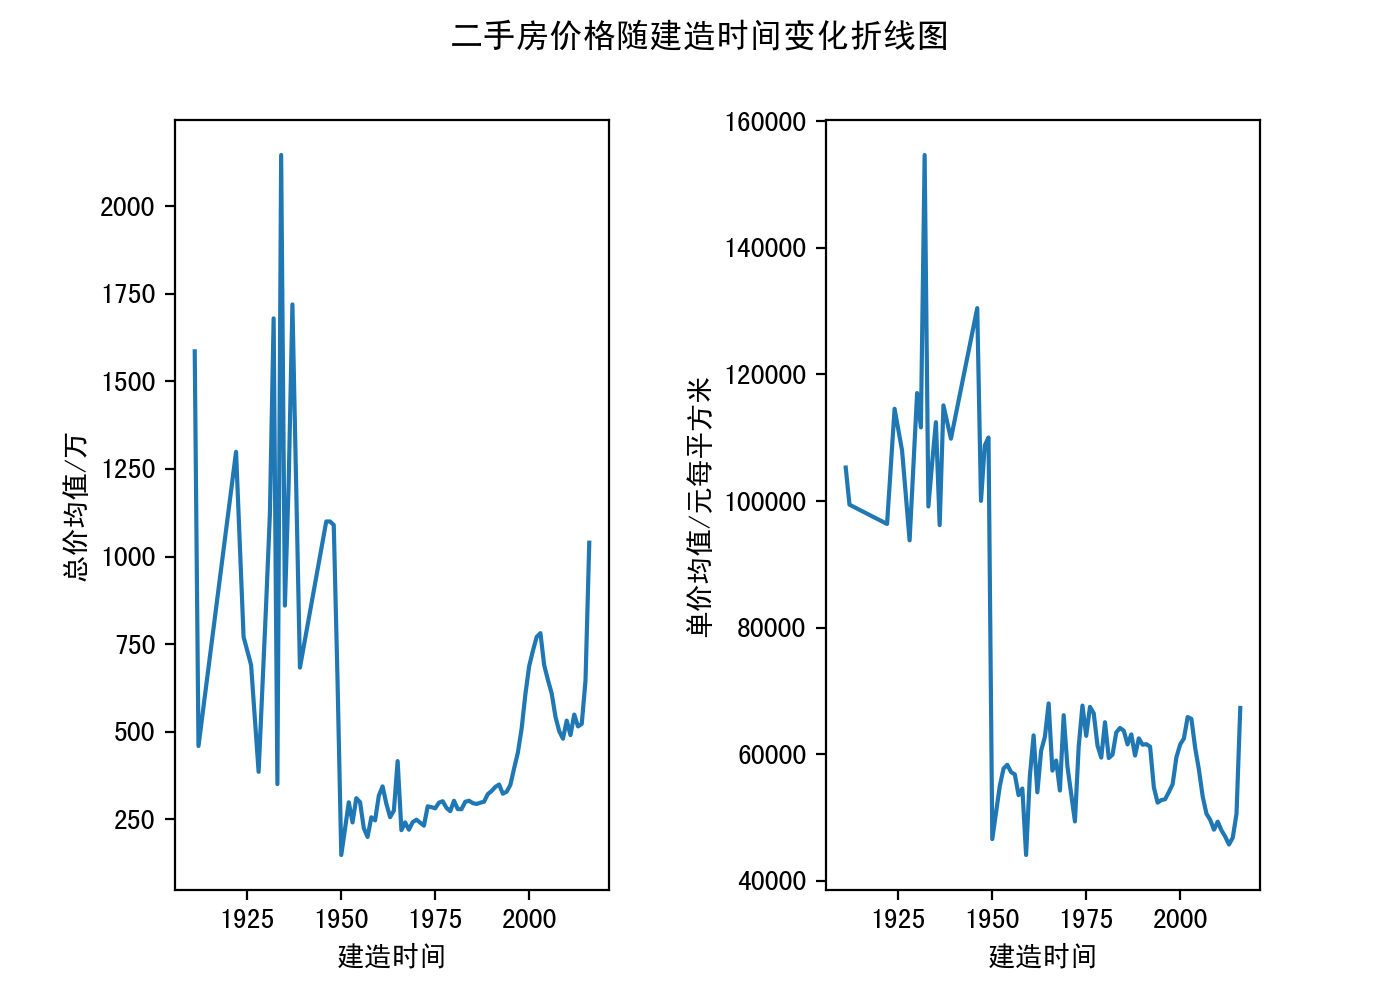

In [34]:
# 绘制二手房价格随建造时间变化的折线图
fig,axes = plt.subplots(1,2,figsize=(7,5))
average_price_affected_by_create_time = new_data['总价'].groupby(new_data['建造时间']).mean()
average_unit_price_affected_by_create_time = new_data['单价'].groupby(new_data['建造时间']).mean()
 
average_price_affected_by_create_time.plot(kind='line',ax=axes[0])
average_unit_price_affected_by_create_time.plot(kind='line',ax=axes[1])
 
axes[0].set(ylabel='总价均值/万')
axes[1].set(ylabel='单价均值/元每平方米')
 
fig.suptitle('二手房价格随建造时间变化折线图')
plt.subplots_adjust(wspace=0.5)   # 设置figure对象中子图的间距
plt.savefig('p19')   # 保存图片